# Artificial Intelligence Project 

# Unit I

## 1.- Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Load data from csv and store it in dataframe
data = pd.read_csv('HCV-Egy-Data.csv') 

# Showing the first rows.
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


## 2.- Data set description - "Hepatitis C Virus (HCV) for Egyptian patients" 

Egyptian patients who underwent HCV treatment dosages for about 18 months. 

Discretization should be applied based on expert recommendations. There is an attached file which shows how the different features followed a certain discretization and what are the different values that each feature can take.

In the next list every feature inside the database is present, and between parenthesis, the possible range of values that each one of these variables can take is written.

* Age: Age (32:61)
* Gender: Gender (Male=1, Female=2)
* BMI: Body Mass Index (22:35)
* Fever: Fever (Absent=1, Present=2)
* Nausea/Vomting: Nausea/Vomting (Absent=1, Present=2)
* Headache: Headache (Absent=1, Present=2)
* Diarrhea: Diarrhea (Absent=1, Present=2)
* Fatigue & generalized bone ache: Fatigue & generalized bone ache (Absent=1, Present=2)
* Jaundice: Jaundice (Absent=1, Present=2)
* Epigastric pain: Epigastric pain (Absent=1, Present=2)
* WBC: White blood cell (2991:12101)
* RBC: red blood cells (3816422:5018451)
* HGB: Hemoglobin (2:20)
* Plat: Platelets (93013:226464)
* AST 1 aspartate transaminase ratio (39:128)
* ALT 1 alanine transaminase ratio 1 week (39:128)
* ALT 4 alanine transaminase ratio 12 weeks (39:128)
* ALT 12 alanine transaminase ratio 4 weeks (39:128)
* ALT 24 alanine transaminase ratio 24 weeks (39:128)
* ALT 36 alanine transaminase ratio 36 weeks (5:128)
* ALT 48 alanine transaminase ratio 48 weeks (5:128)
* ALT after 24 w alanine transaminase ratio 24 weeks (5:45)
* RNA Base: RNA Base (11:1201086)
* RNA 4: RNA 4 weeeks (5:1201715)
* RNA 12: RNA 12 weeks (5:3731527)
* RNA EOT: RNA end-of-treatment (5:808450)
* RNA EF: RNA Elongation Factor (5:808450)
* Baseline histological Grading: Baseline histological Grading (3:16)
* Baselinehistological staging: Baseline histological staging (1:4)

#### a) Indicating the type each variable is (numerical, categorical, etc.).

In [3]:
data.dtypes

Age                                 int64
Gender                              int64
BMI                                 int64
Fever                               int64
Nausea/Vomting                      int64
Headache                            int64
Diarrhea                            int64
Fatigue & generalized bone ache     int64
Jaundice                            int64
Epigastric pain                     int64
WBC                                 int64
RBC                                 int64
HGB                                 int64
Plat                                int64
AST 1                               int64
ALT 1                               int64
ALT4                                int64
ALT 12                              int64
ALT 24                              int64
ALT 36                              int64
ALT 48                              int64
ALT after 24 w                      int64
RNA Base                            int64
RNA 4                             

#### b) Column names

In [4]:
data.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

#### c) Removing column blank spaces

In [5]:
data.columns = data.columns.str.replace(' ', '')
raw_headers = data.columns
headers = [str(x) for x in raw_headers]
print(headers)

['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache', 'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24', 'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT', 'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging']


#### d) Adding two variables (from 'Baselinehistologicalstaging')
The new binary variable 'Outcome' indicates whether the patient has Cirrhosis or not (1 or 0) and the categorical variable 'Histologicalstaging' that indicates the histological stage of the disease.

Add a wide explanation of the paper and of these variables and why we create Outcome as a simplified way to write a multiclass variable to a binary one

Some techniques of this project have been inspired by Nasr, M. in his the paper called '[A novel model based on non invasive methods for prediction of liver fibrosis](https://www.researchgate.net/publication/323130913_A_novel_model_based_on_non_invasive_methods_for_prediction_of_liver_fibrosis)' which uses this database containing 1741 Hepatitis C virus patients who were treated with a combined therapy interferon-Alfa and ribavirin for more than 15 months. The study shows patients who *response to the treatment* (diminishing of plasma HCV RNA in blood at 12 or 24 weeks after stopping treatment) and others who does’t show a clearance of the virus were considered as *non responder*. Thus, what researchers in this paper did was creating a classifier algorithm to try to predict the risk and rate of liver fibrosis progression.

Therefore, following a similar approach as researchers did, the 'Baseline histological staging' is the class label with values F0, F1, F2, F3, F4. These labels represent different prognosis levels of Liver Fibrosis as follows: No Fibrosis (F0), Portal Fibrosis (F1), Few Septa (F2), Many Septa (F3), Cirrhosis (F4). Hence, The variable 'Histologicalstaging' was created to have these labels available inside the database. 

Moreover, the variable 'Outcome' was created to have a clear distinction between those patients who have reach a cirrhotic stage and those that have not. This variable create a binary variable from a multiclass one where the 'NoFibrosis', 'PortalFibrosis', 'FewSepta', 'ManySepta' are considered as 0 (Abscense of Cirrhosis) and only the cases with confirmed cirrhosis are labeled as 1. 

Note: following the guidelines given in the paper, the stage 'NoFibrosis' was decided to be added, even though there are no individuals bearing that stage in this dataset.

In [6]:
# Creating the variable 'Histological Staging'.
category = pd.cut(data.Baselinehistologicalstaging, right=False,
                bins=[0,1,2,3,4,5],labels=['NoFibrosis','PortalFibrosis','FewSepta','ManySepta','Cirrhosis'])
data.insert(29,'Histologicalstaging', category)
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain',
       'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24',
       'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT',
       'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging',
       'Histologicalstaging'],
      dtype='object')

In [7]:
# Creating the variable 'Outcome'.
new_var= np.where((data['Baselinehistologicalstaging'] < 4), 0,1)
data.insert(30,'Outcome', new_var) # In the 8th position.
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain',
       'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24',
       'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT',
       'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging',
       'Histologicalstaging', 'Outcome'],
      dtype='object')

In [8]:
# Identifying the type of each variable.
data.dtypes

Age                               int64
Gender                            int64
BMI                               int64
Fever                             int64
Nausea/Vomting                    int64
Headache                          int64
Diarrhea                          int64
Fatigue&generalizedboneache       int64
Jaundice                          int64
Epigastricpain                    int64
WBC                               int64
RBC                               int64
HGB                               int64
Plat                              int64
AST1                              int64
ALT1                              int64
ALT4                              int64
ALT12                             int64
ALT24                             int64
ALT36                             int64
ALT48                             int64
ALTafter24w                       int64
RNABase                           int64
RNA4                              int64
RNA12                             int64


In [9]:
# Printing the first rows of the modified dataframe.
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Histologicalstaging,Outcome
0,56,1,35,2,1,1,1,2,2,2,...,5,655330,634536,288194,5,5,13,2,FewSepta,0
1,46,1,29,1,2,2,1,2,2,1,...,44,40620,538635,637056,336804,31085,4,2,FewSepta,0
2,57,1,33,2,2,2,2,1,1,1,...,5,571148,661346,5,735945,558829,4,4,Cirrhosis,1
3,49,2,33,1,2,1,2,1,2,1,...,33,1041941,449939,585688,744463,582301,10,3,ManySepta,0
4,59,1,32,1,1,2,1,2,2,2,...,30,660410,738756,3731527,338946,242861,11,1,PortalFibrosis,0


## 3.- Descriptive Statistical Analysis

In [10]:
# Describe data
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462,0.261372
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392,0.439541
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000,1.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000,1.000000


In [11]:
# For categorical data
data.describe(include='all') 

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Histologicalstaging,Outcome
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385,1385.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cirrhosis,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362,NaN
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462,NaN,0.261372
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392,NaN,0.439541
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000,NaN,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000,NaN,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000,NaN,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000,NaN,1.000000


In [12]:
# Number of entries in the dataset
print(data.shape)

(1385, 31)


In [13]:
# Total number of unique values per variable
print(data.nunique())

Age                              30
Gender                            2
BMI                              14
Fever                             2
Nausea/Vomting                    2
Headache                          2
Diarrhea                          2
Fatigue&generalizedboneache       2
Jaundice                          2
Epigastricpain                    2
WBC                            1305
RBC                            1384
HGB                               6
Plat                           1375
AST1                             90
ALT1                             90
ALT4                             90
ALT12                            90
ALT24                            90
ALT36                            91
ALT48                            91
ALTafter24w                      25
RNABase                        1384
RNA4                           1384
RNA12                          1001
RNAEOT                         1002
RNAEF                          1004
BaselinehistologicalGrading 

In [14]:
# Counting the number of samples in each type of 'Outcome'
data["Outcome"].value_counts() 

0    1023
1     362
Name: Outcome, dtype: int64

In [15]:
# Counting the number of samples in each category of 'BaselinehistologicalGrading'
data['BaselinehistologicalGrading'].value_counts()

15    139
11    121
14    106
9     103
6     102
12    101
8      97
13     95
4      94
5      93
3      89
10     87
16     86
7      72
Name: BaselinehistologicalGrading, dtype: int64

In [16]:
# Counting the number of samples in each stage of 'Baselinehistologicalstaging'
data['Baselinehistologicalstaging'].value_counts()

4    362
3    355
1    336
2    332
Name: Baselinehistologicalstaging, dtype: int64

## 4.-  Training, validation and test sets

The available cases will be now separated into two subsets, without sharing any case in common:

- Training subset
- Test subset

The training subset will be used for the learning of some models. And the test subset will be used lately to estimate the final performance.

For the separation into subsets, the following issues have been taken into account:

##### a) What percentage of available cases will you consider in the training subset? And in the test subset?

Training set (75%)

Test set (25%)

##### b) Consider that you build a binary classifier (two classes, C1 and C2). Discuss what would happen when evaluating the classifier's performance if the training subset with which the classifier is designed had almost all the cases of class C1 and the test subset had almost all the cases of class C2.

This would mean that the distribution of the datasets was not done in a balanced way, so the final performance of the predictive model will not work properly.

##### c) How could you avoid overtraining in the design of the classifier? What would be the process to be followed to find the best parameters of that model?

To avoid overtraining in the design of the classifier, the training set is divided again into training set and validation set, but before that, part of the dataset should be divided as X data (containing almost all of the variables) and Y data (containing the output). And the process to find the best paramets will be the cross-validation or grid search techniques within the subsets previously mentioned.

##### e) Discuss what you should do with the original data set if you find that the distribution of the test subset cases is different from the distribution of the training subset.

In that case, the solution will be to use a Stratified K-fold validation, which is a variation of the classifier where each set contains approximately the same percentage of samples for each class.

## Training and Test:

In [17]:
#Create input and output data

c = list(data.columns) 
#c.remove('Histologicalstaging') # Categorical values are removed

x = data[c]
y = data['Outcome']

x.shape, y.shape

((1385, 31), (1385,))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Split the data set in two different subsets: training and test

x, y = shuffle(x,y, random_state=0)      # The random state is used to obtain always the same partition
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=30) # By default 75% and 25%

In [19]:
# Describing the training set
X_train.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,...,1038.000000,1038.000000,1.038000e+03,1.038000e+03,1.038000e+03,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,46.275530,1.491329,28.555877,1.500963,1.506744,1.494220,1.516378,1.495183,1.500000,1.508671,...,83.401734,33.501927,5.969012e+05,5.959717e+05,2.857871e+05,286086.498073,289285.992293,9.688825,2.506744,0.251445
std,8.691387,0.500166,4.120679,0.500240,0.500196,0.500208,0.499973,0.500218,0.500241,0.500166,...,25.989937,7.055879,3.562016e+05,3.603753e+05,2.887703e+05,265273.910849,270486.490586,3.990404,1.121136,0.434053
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,3.850000e+02,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.250000,28.000000,2.727412e+05,2.691500e+05,5.000000e+00,5.000000,5.000000,6.000000,1.000000,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.500000,2.000000,...,83.000000,34.000000,6.031400e+05,5.978410e+05,2.326715e+05,251991.500000,239315.000000,10.000000,3.000000,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,105.000000,40.000000,8.936190e+05,8.960975e+05,5.135968e+05,517526.500000,533084.000000,13.000000,4.000000,1.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810056.000000,16.000000,4.000000,1.000000


In [20]:
# Describing the test set
X_test.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome
count,347.000000,347.00000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.000000,347.000000,3.470000e+02,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,46.449568,1.48415,28.766571,1.559078,1.489914,1.501441,1.461095,1.510086,1.504323,1.489914,...,84.311239,33.247839,5.731528e+05,6.156250e+05,297627.590778,292368.244957,297637.097983,9.979827,2.625360,0.291066
std,9.057279,0.50047,3.941807,0.497215,0.500620,0.500720,0.499204,0.500620,0.500703,0.500620,...,26.938508,7.133064,3.469655e+05,3.681887e+05,275083.203057,262735.511008,259470.328115,4.120602,1.119063,0.454910
min,32.000000,1.00000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,1.100000e+01,8.130000e+02,5.000000,5.000000,5.000000,3.000000,1.000000,0.000000
25%,38.500000,1.00000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,27.000000,2.560475e+05,3.054045e+05,5.000000,5.000000,5.000000,6.000000,2.000000,0.000000
50%,46.000000,1.00000,29.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,86.000000,33.000000,5.719860e+05,6.009960e+05,236714.000000,244027.000000,273535.000000,10.000000,3.000000,0.000000
75%,55.000000,2.00000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,107.000000,40.000000,8.655910e+05,9.774050e+05,541092.000000,524606.000000,514418.000000,14.000000,4.000000,1.000000
max,61.000000,2.00000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,45.000000,1.200762e+06,1.200118e+06,810028.000000,808142.000000,810333.000000,16.000000,4.000000,1.000000


## 5.- Analyzing Feature Patterns using Visualization

#### a) Visualize the histograms of the variables in the database, choosing a number of intervals suitable for each variable. 

The number of bins and the figure size had been chosen in such a way that we can visualize properly almost every histogram (except the units of Plat). However, to get a proper adjustment of the intervals and a better visualization of each variable, a special function for plotting the histogram as well as the boxplots was created in future steps.

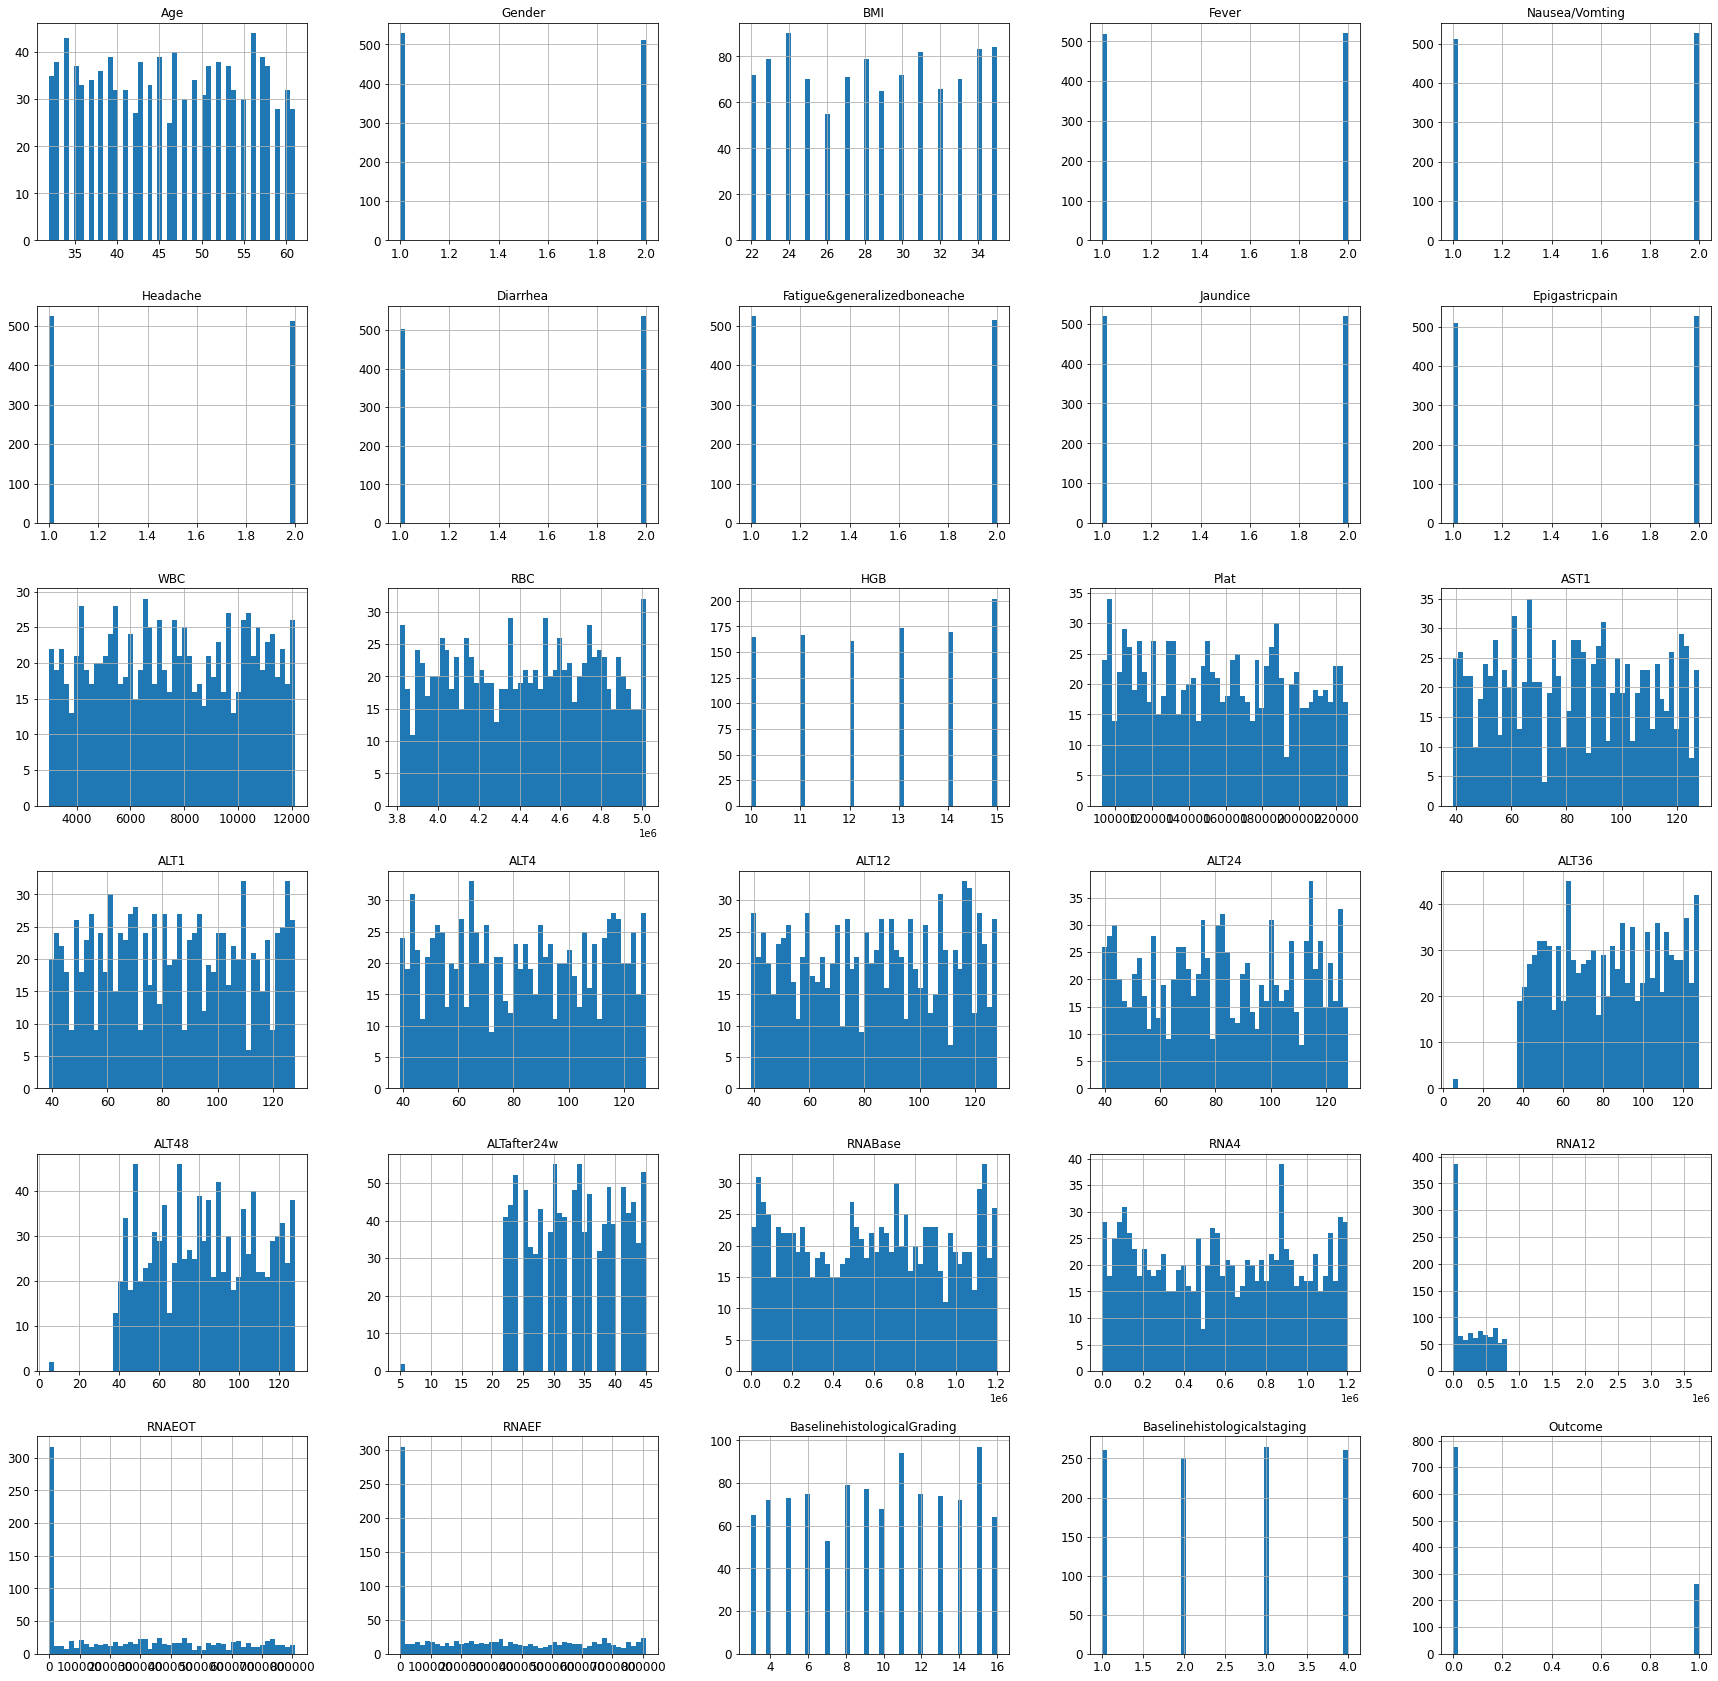

In [21]:
# Histogram for the training set
X_train.hist(figsize=(30, 30), bins=50, xlabelsize=12, ylabelsize=12);

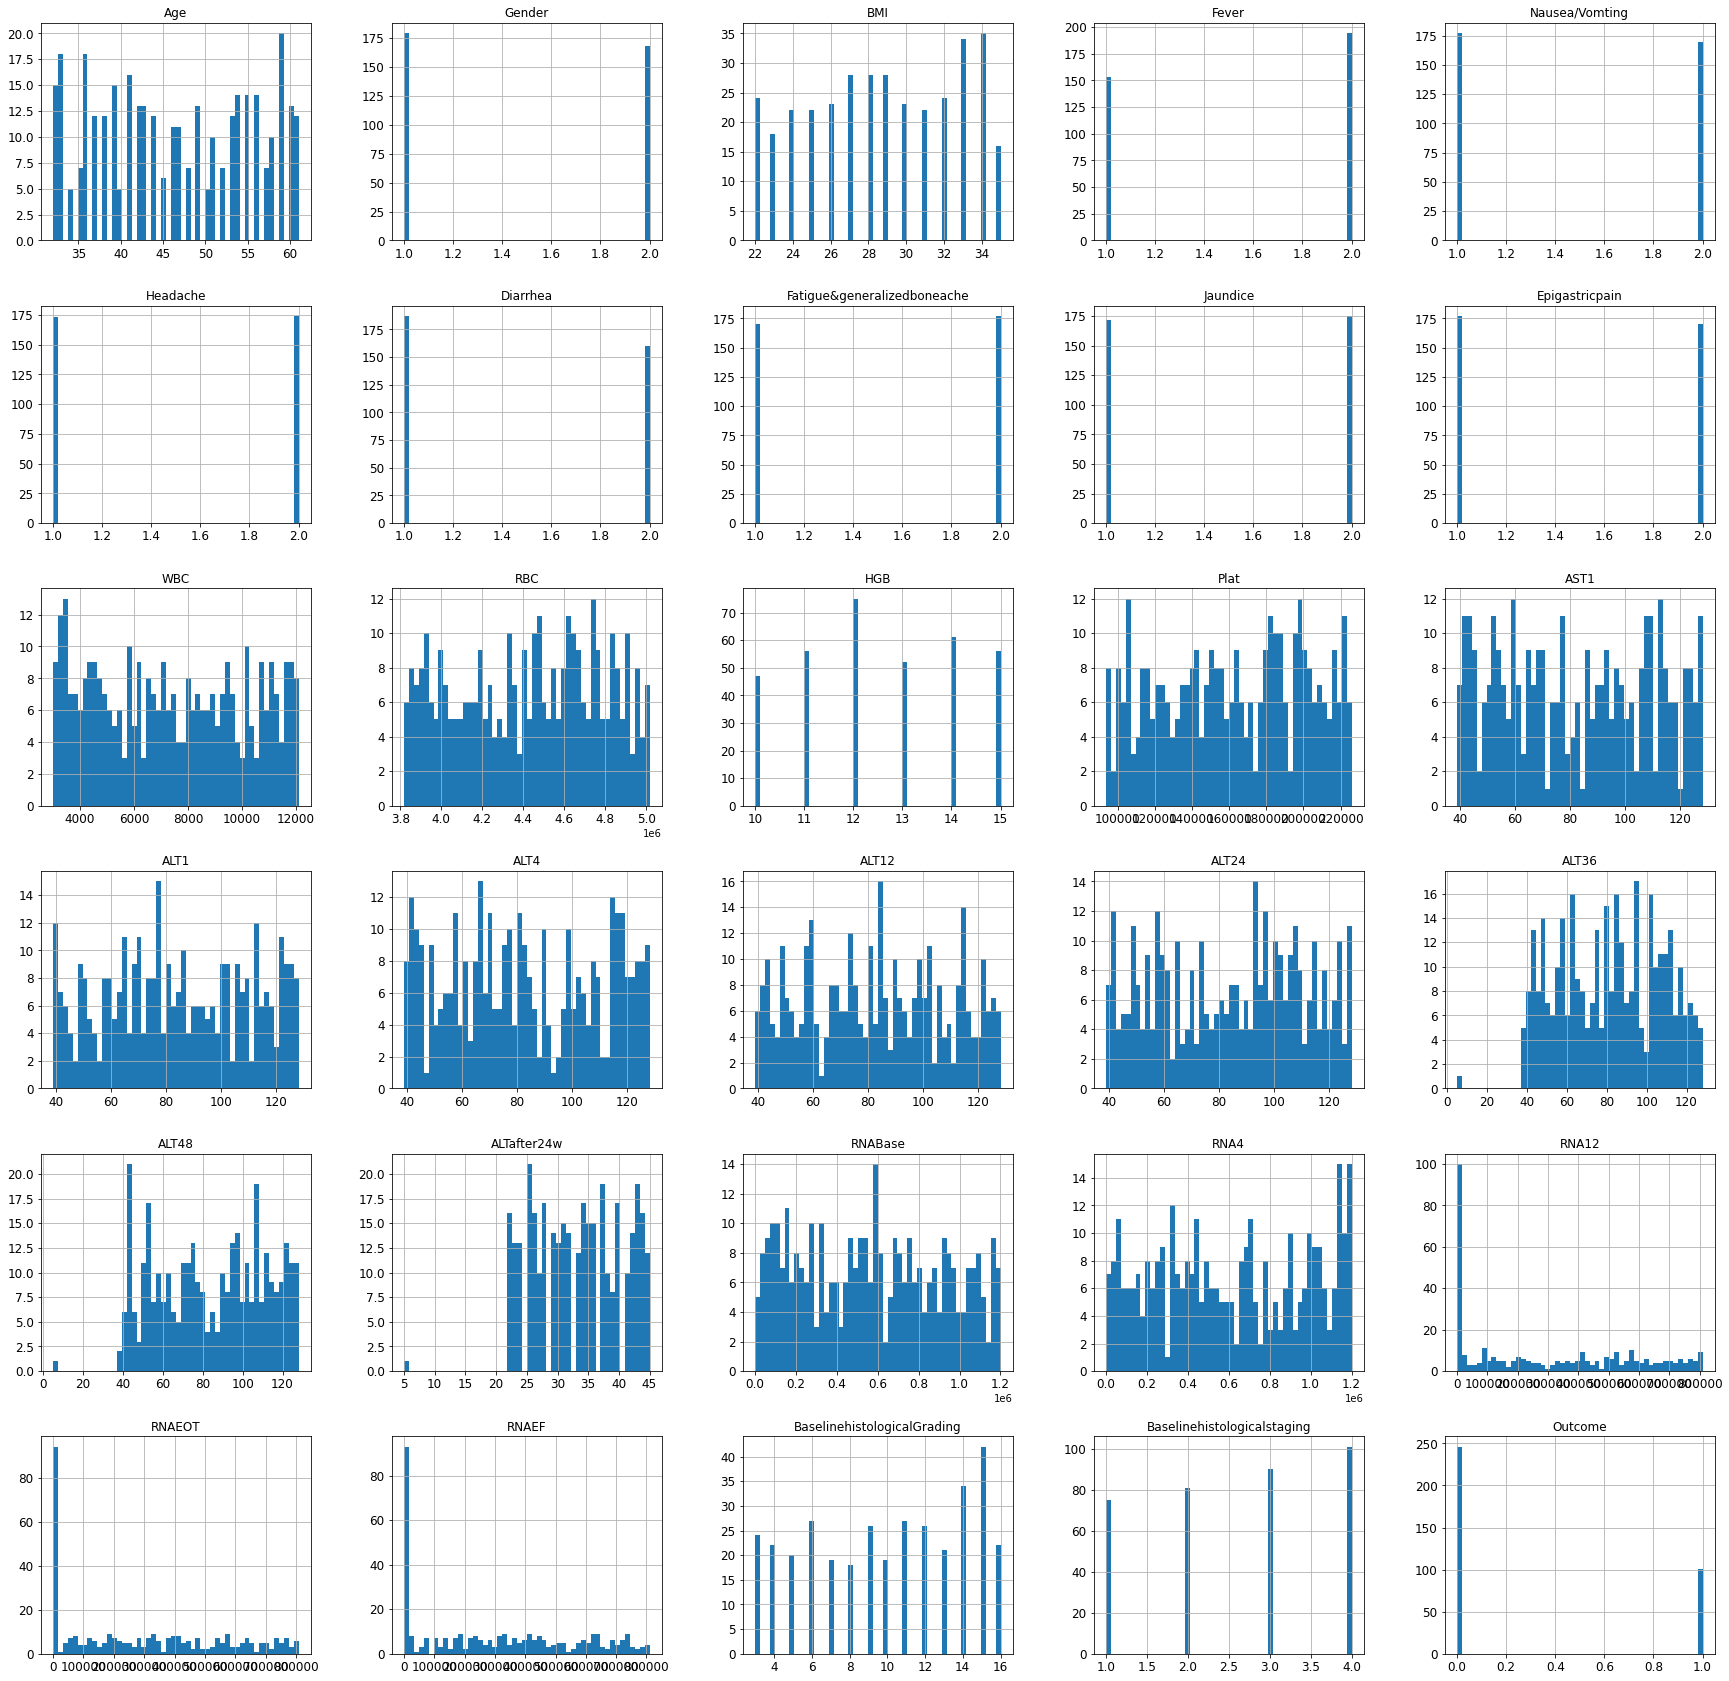

In [22]:
# Histogram for the test set
X_test.hist(figsize=(30, 30), bins=50, xlabelsize=12, ylabelsize=12);

In the histogram below, we can see how the training, as well as the test sets are well distributed in what concerns about the number of samples in each Histological Staging ('PortalFibrosis', 'FewSepta', 'ManySepta', 'Cirrhosis').

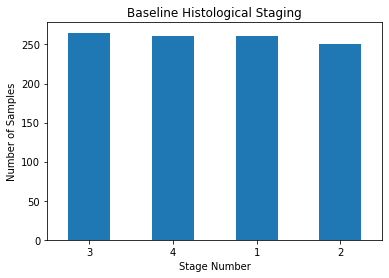

In [23]:
# Histogram for the training set
X_train['Baselinehistologicalstaging'].value_counts().plot.bar(title='Baseline Histological Staging',
                                                               xlabel = 'Stage Number', ylabel = 'Number of Samples', rot=0);

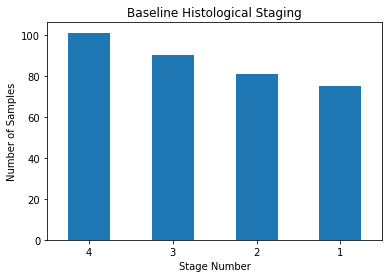

In [24]:
# Histogram for the test set
X_test['Baselinehistologicalstaging'].value_counts().plot.bar(title='Baseline Histological Staging',
                                                               xlabel = 'Stage Number', ylabel = 'Number of Samples', rot=0);

It can be seen in the database that the most prevalent Grade is 15 (for the training set) and 14 (for the test set). Moreover, as we know that these grades can take values ranging between 1 and 16 and since the mean in both sets is almost 2 units higher than 8, it can be stated that there is a slightly majority of samples having higher grades, therefore, a slightly worse condition, in both the training and the test sets.

The mean of the grades (in the training set) is:  9.688824662813103


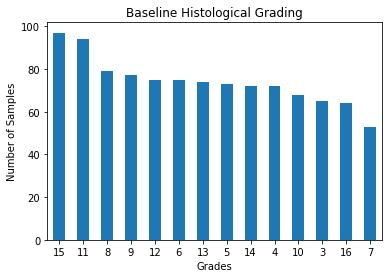

In [25]:
# Histogram for the training set
X_train['BaselinehistologicalGrading'].value_counts().plot.bar(title="Baseline Histological Grading", 
                                                            xlabel = 'Grades', ylabel = 'Number of Samples', rot=0);

print('The mean of the grades (in the training set) is: ', X_train['BaselinehistologicalGrading'].mean())

The mean of the grades (in the test set) is:  9.979827089337176


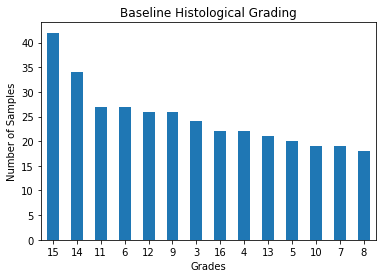

In [26]:
# Histogram for the test set
X_test['BaselinehistologicalGrading'].value_counts().plot.bar(title="Baseline Histological Grading", 
                                                            xlabel = 'Grades', ylabel = 'Number of Samples', rot=0);

print('The mean of the grades (in the test set) is: ', X_test['BaselinehistologicalGrading'].mean())

It can also be easily seen that there are unbalanced clases in the *'Outcome'* variable for both sets. 
It is problematic in the training set because the algorithm would mostly learn how to classify patients without Cirrhosis rather than detecting those who has the condition. Thus, this error would be fixed in future steps.

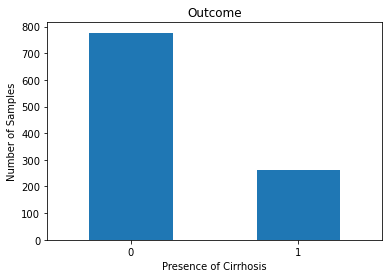

In [27]:
# Histogram for the training set
X_train['Outcome'].value_counts().plot.bar(title="Outcome", xlabel = 'Presence of Cirrhosis', ylabel = 'Number of Samples',
                                             rot=0);

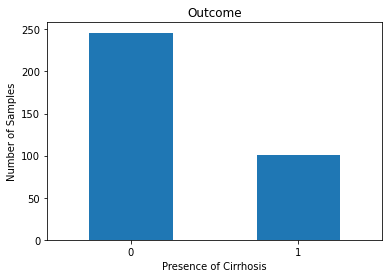

In [28]:
# histogram for the test set
X_test['Outcome'].value_counts().plot.bar(title="Outcome", xlabel = 'Presence of Cirrhosis', ylabel = 'Number of Samples',
                                       rot=0);

#### b) Plotting Boxplots

Function that receives as parameters a dataframe (data) and the headers of its features (headers), and what it does is to properly print the histograms and boxplots for each variable. This function takes into consideration the cases when a categorical variable appears because these variables use a special method for boxplot visualization.

In [29]:
def print_boxplots_hist(headers, data):
    
    for header in headers:
        
        x = data[header]
        
        # Try-except block to avoid categorical variables to enter into the boxplot code.
        init_value = x[x.index.values.tolist()[0]] # To find the value of an available index inside the pandas Series 'x'.
        
        
        try:
            trial = float(init_value)
            plt.figure(figsize = (20,4))
            ax1 = plt.subplot(1,2,1)
            ax1.hist(x, bins=70)
            ax1.set_title('Histogram for ' + header)

            ax2 = plt.subplot(1,2,2)
            ax2.boxplot(x)
            ax2.set_title('Boxplot for '+ header)
            plt.show()
        except:
            ax1 = plt.subplot(1,1,1)
            ax1.hist(x, bins=70)
            ax1.set_title('Histogram for ' + header)
            sns.catplot(x='Histologicalstaging', y="BaselinehistologicalGrading", kind="box", data=data, hue = 'Outcome')
            #set_title('Boxplot for '+ header)
            plt.show()

Applying the boxplots to print the histograms and boxplots.

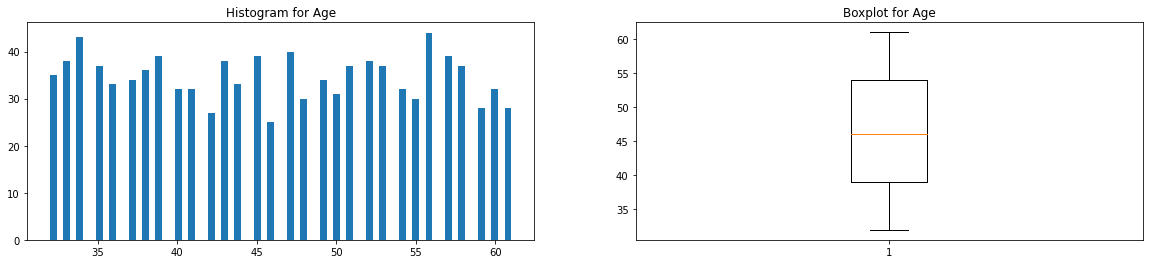

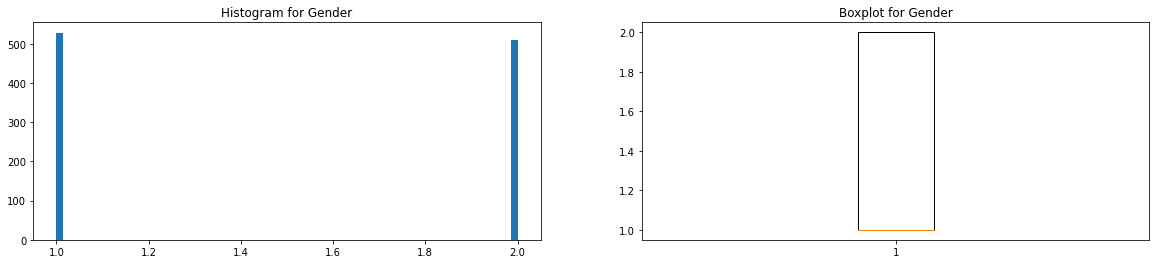

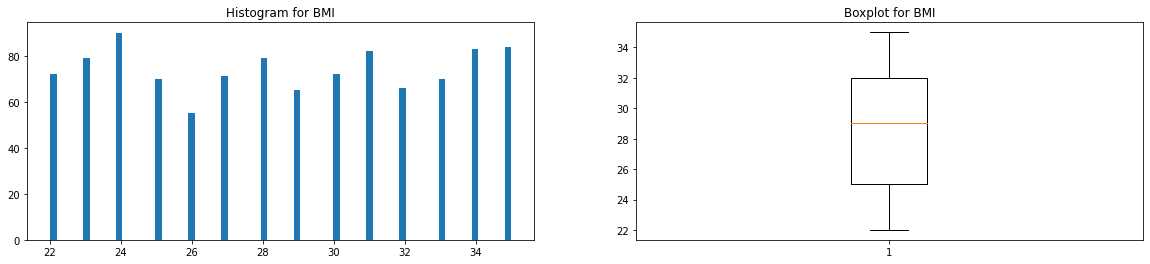

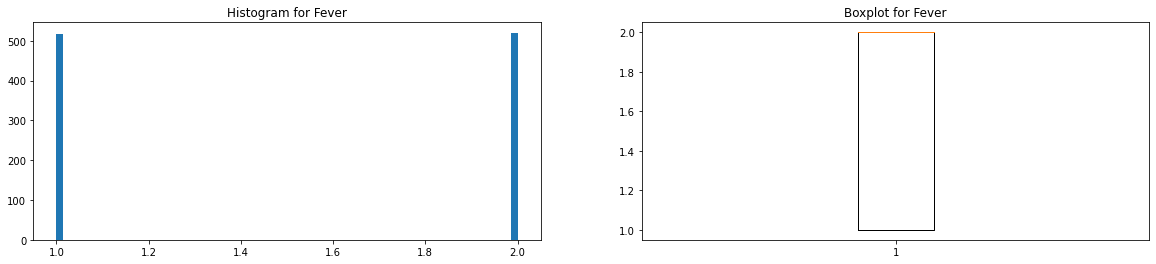

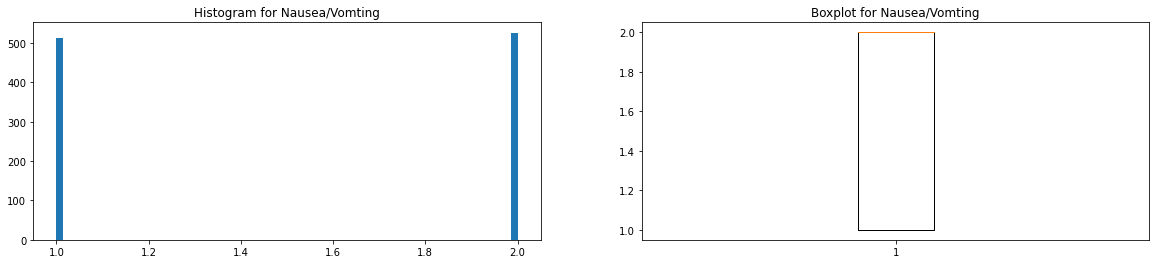

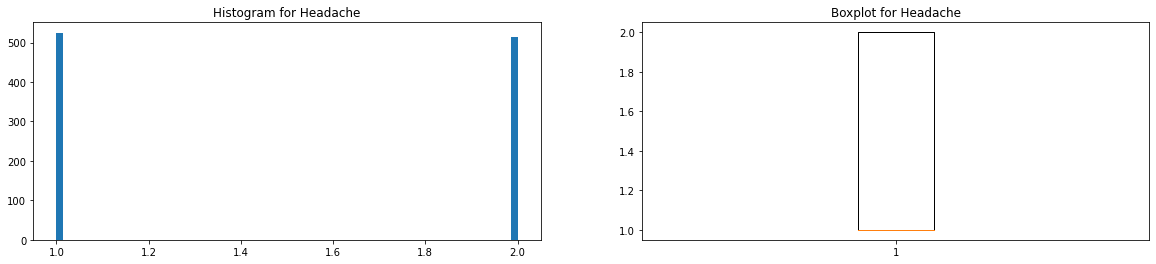

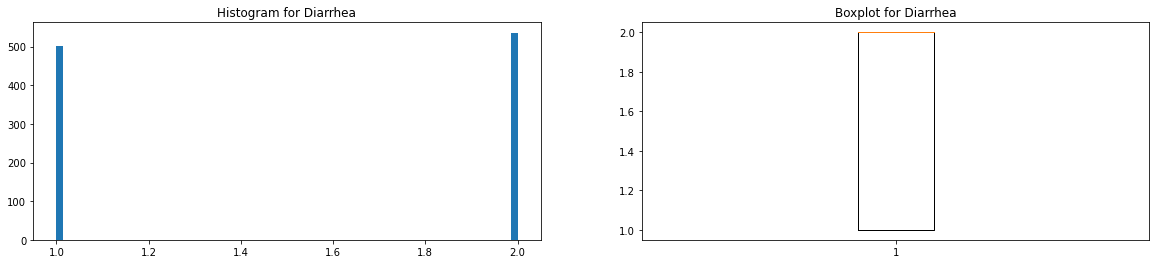

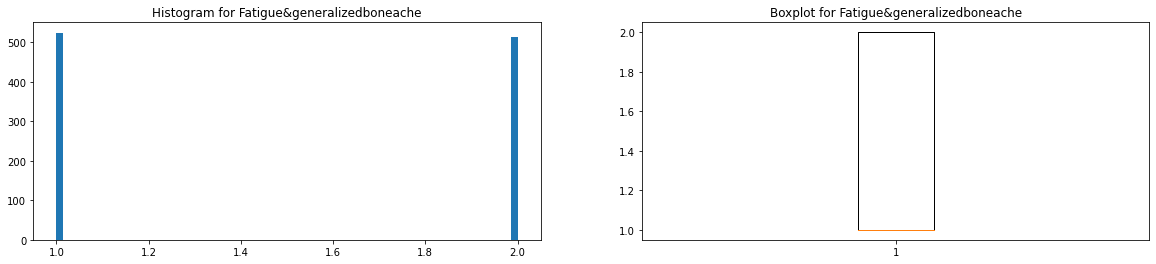

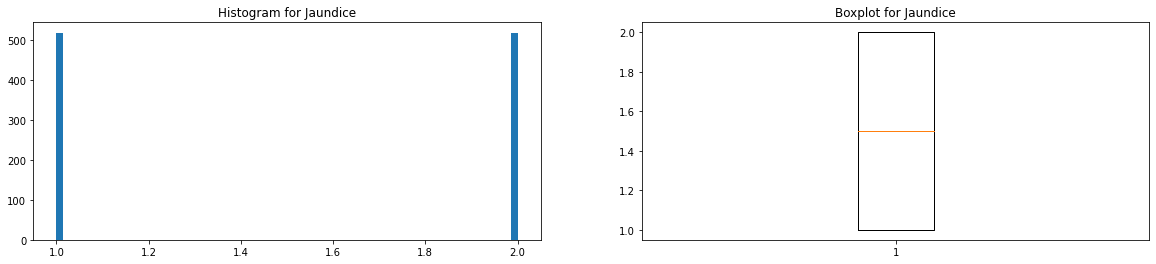

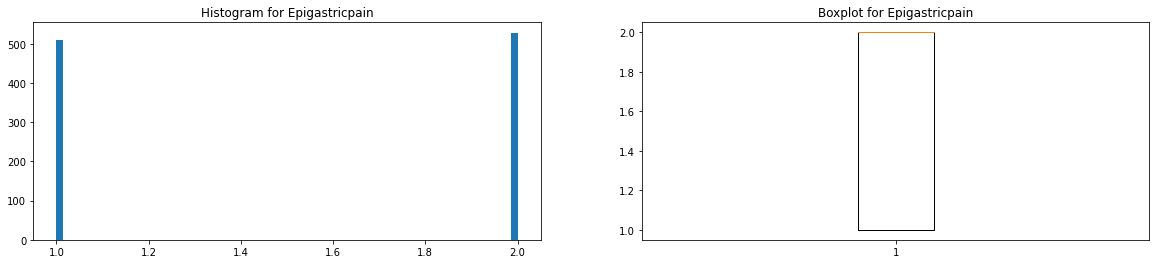

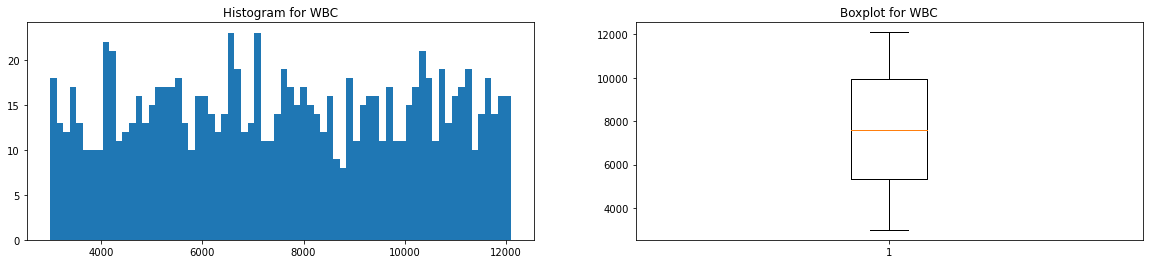

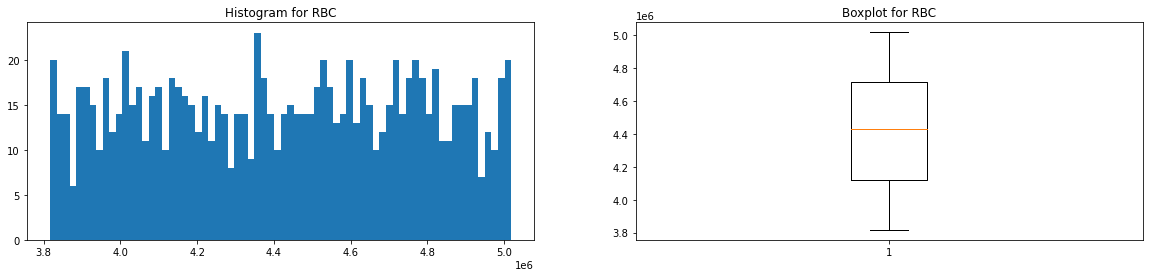

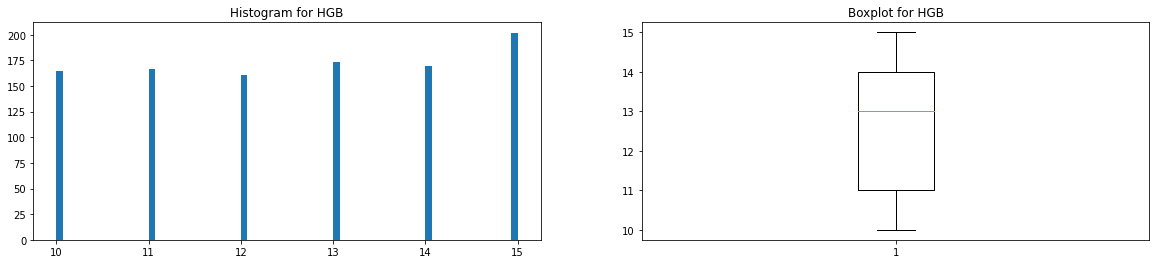

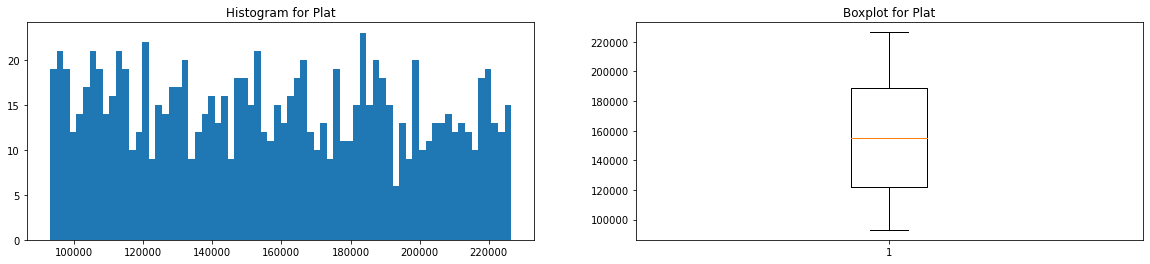

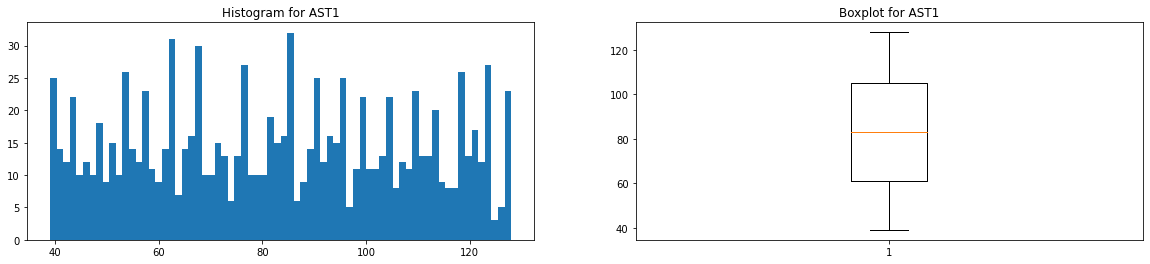

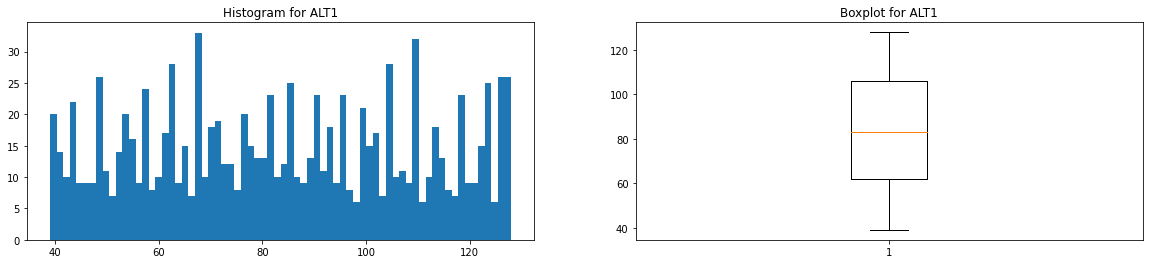

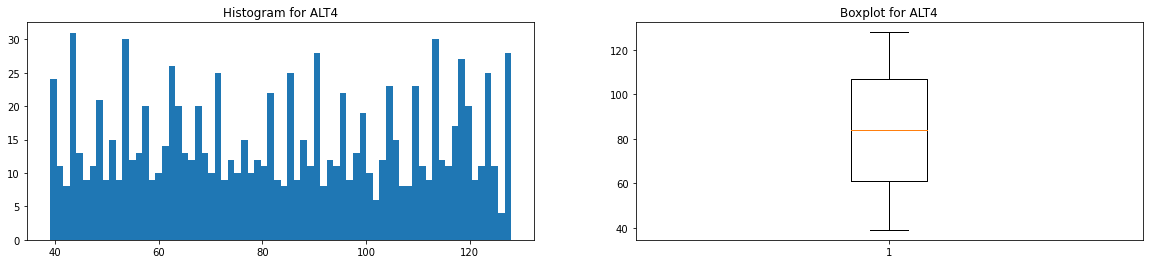

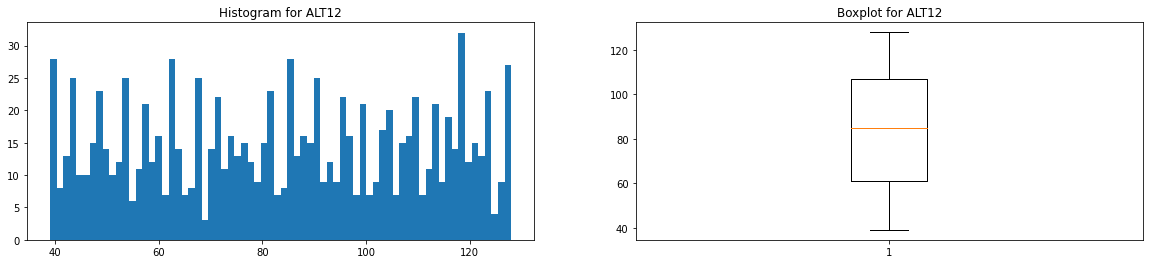

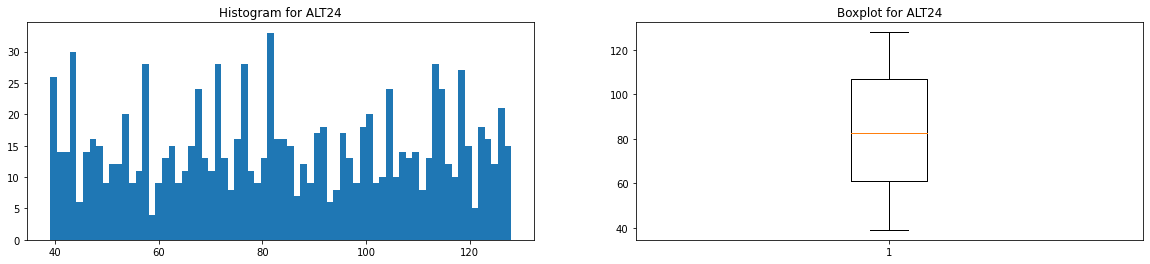

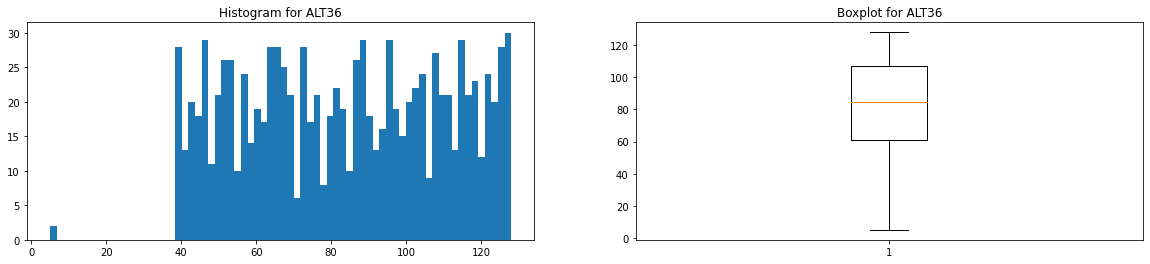

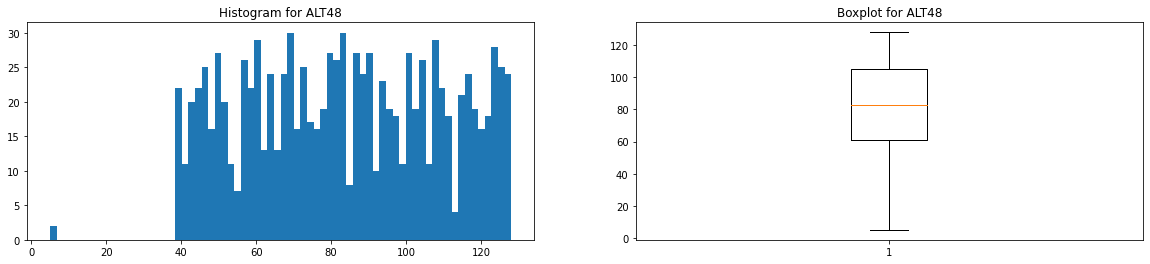

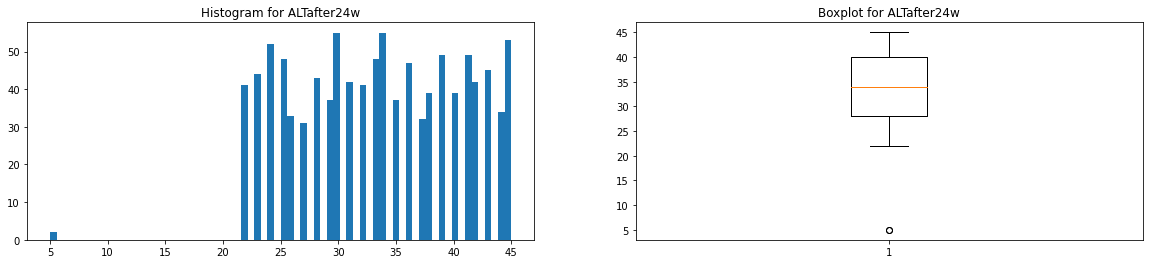

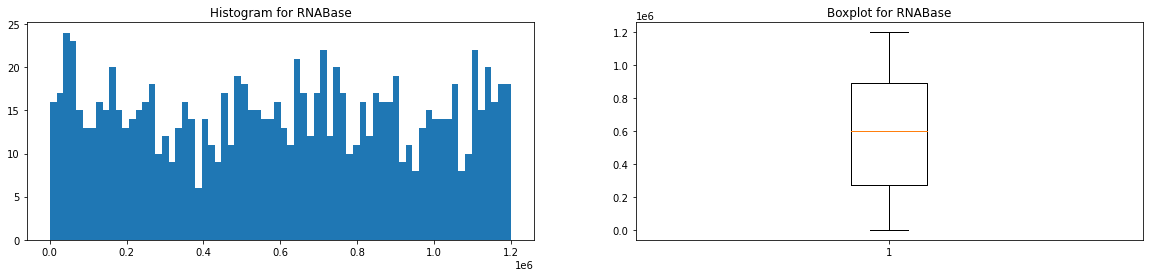

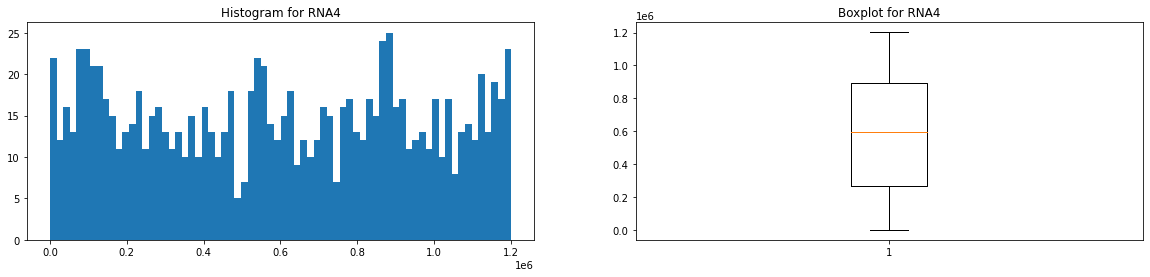

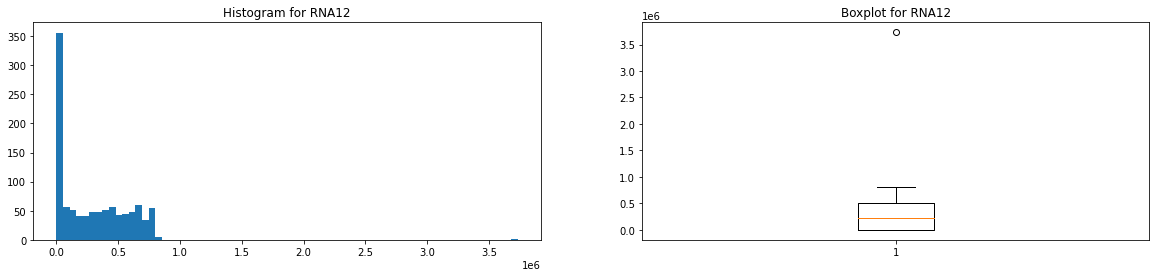

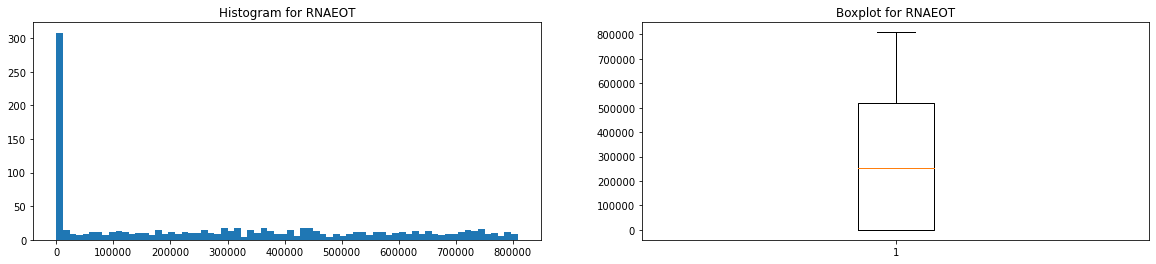

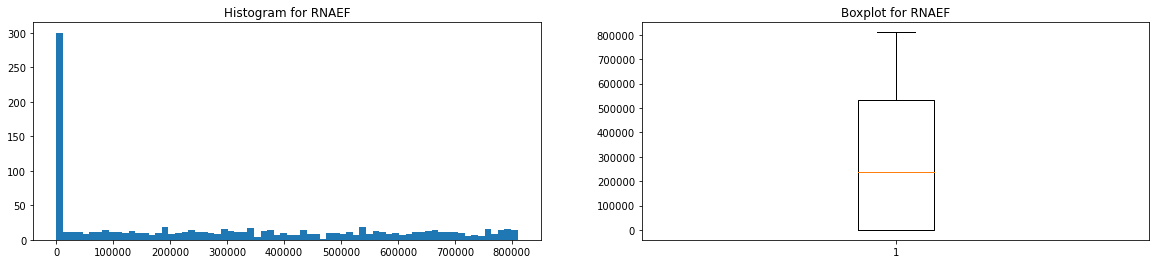

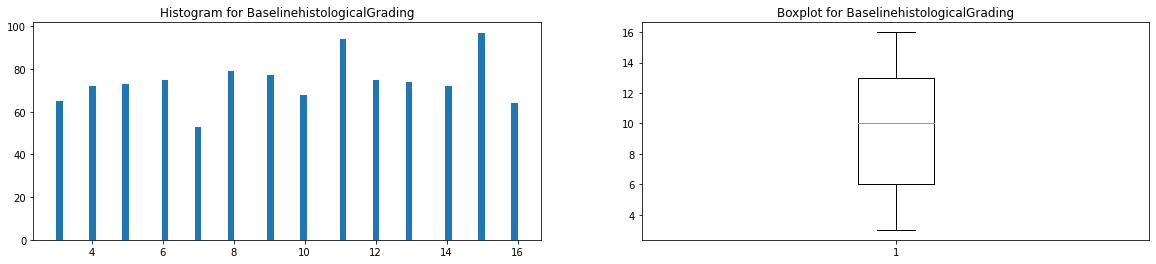

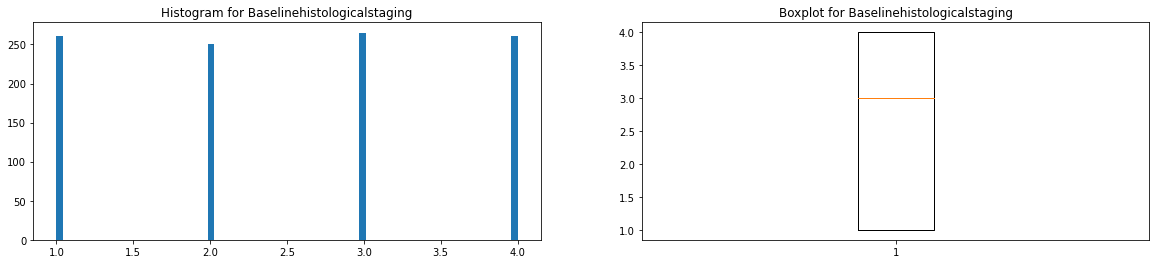

In [30]:
# Individualized histograms and boxplots for the training set.
print_boxplots_hist(headers, X_train)

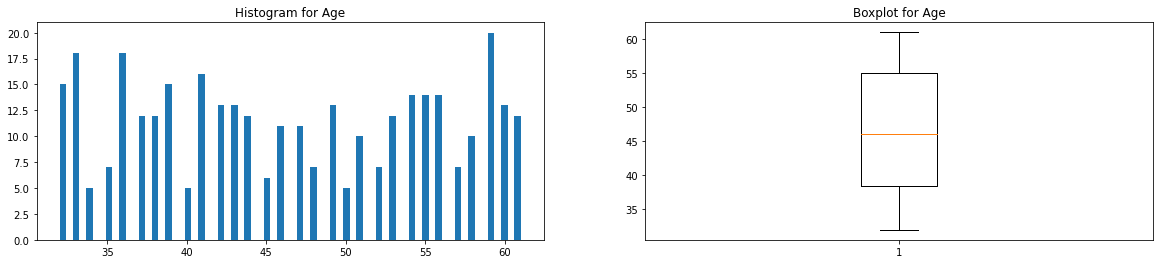

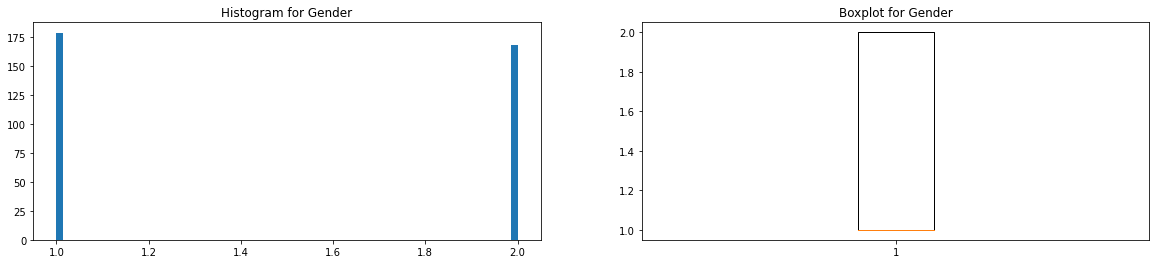

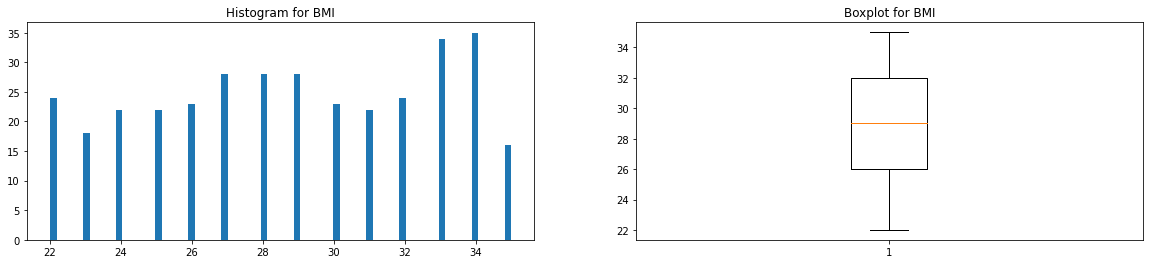

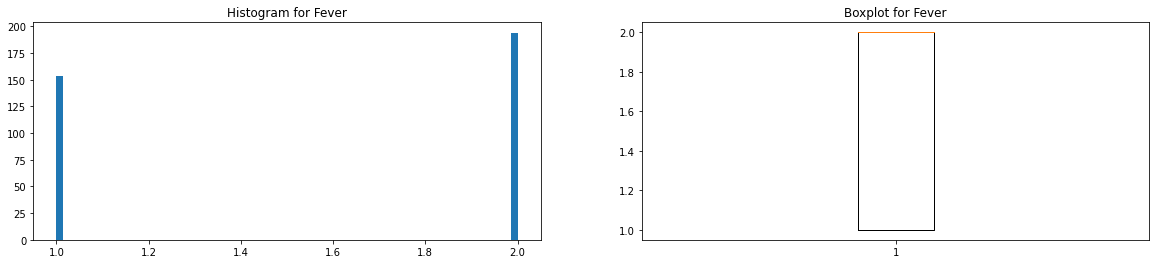

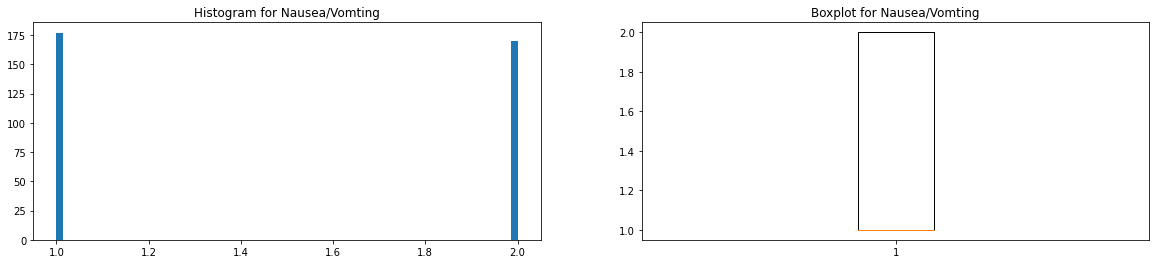

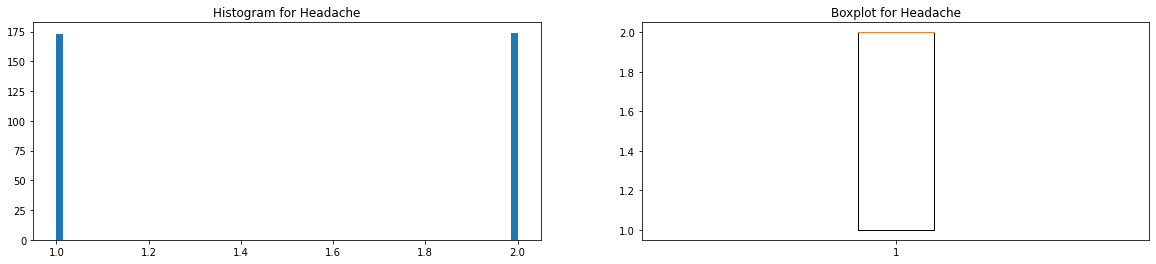

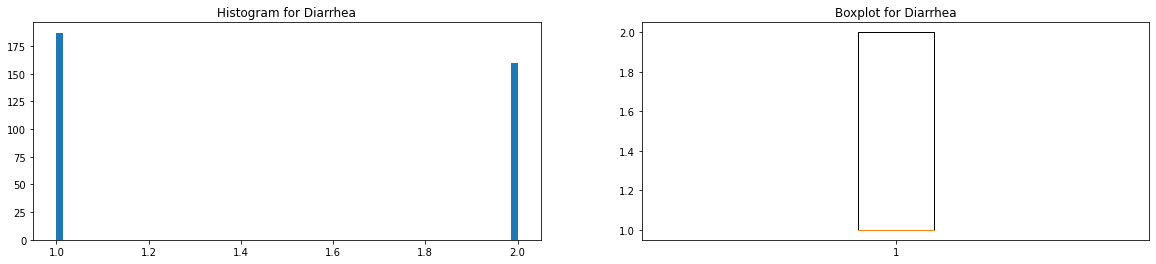

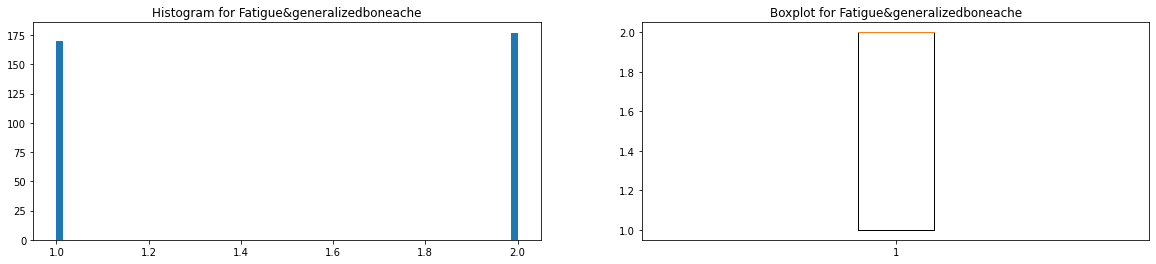

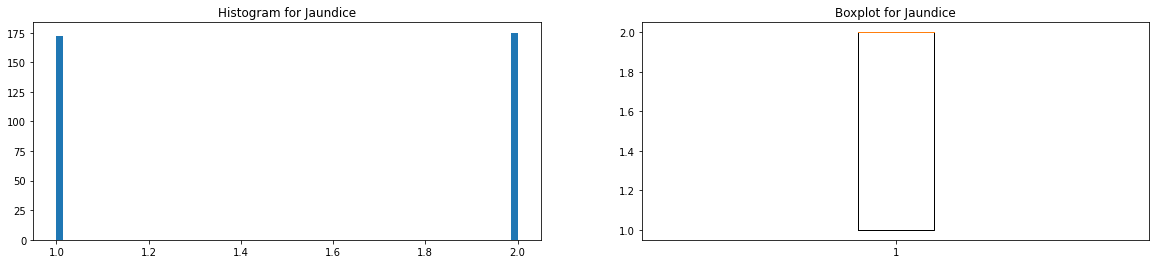

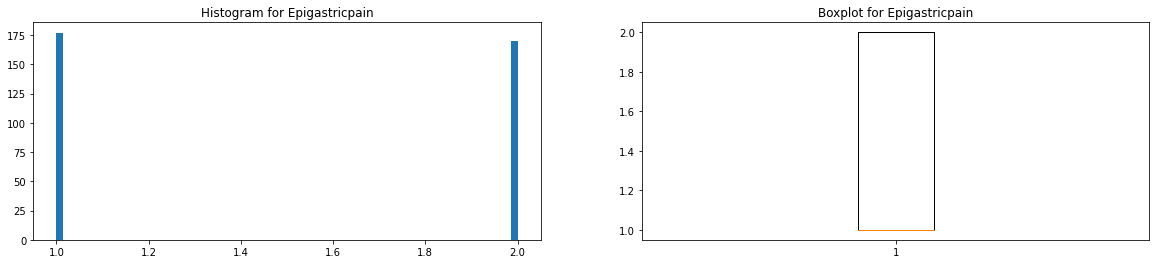

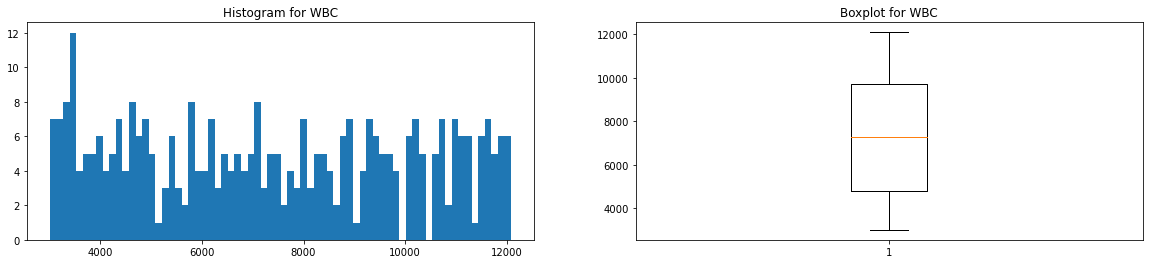

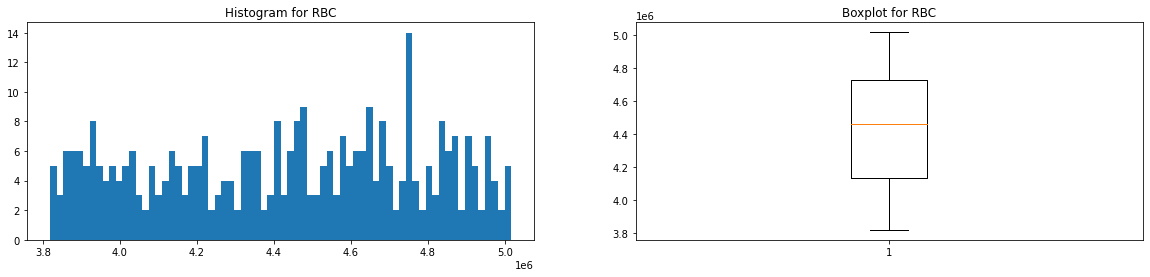

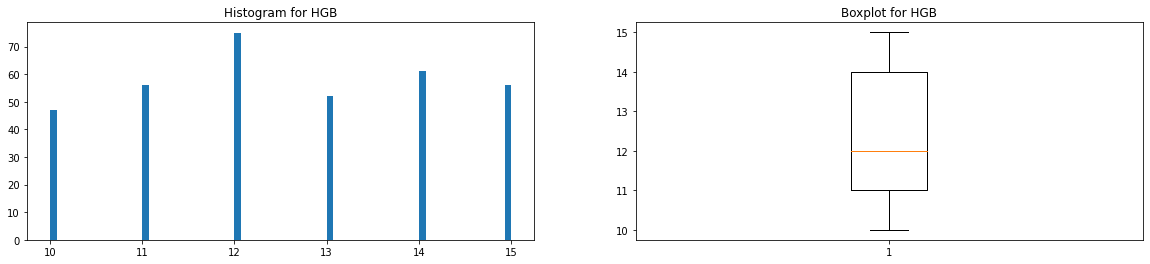

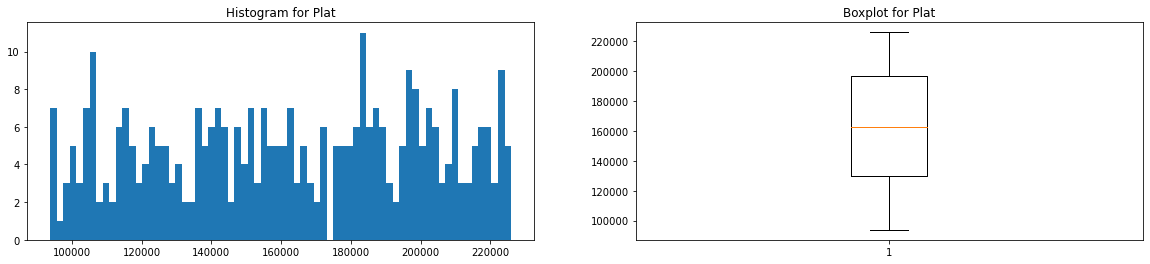

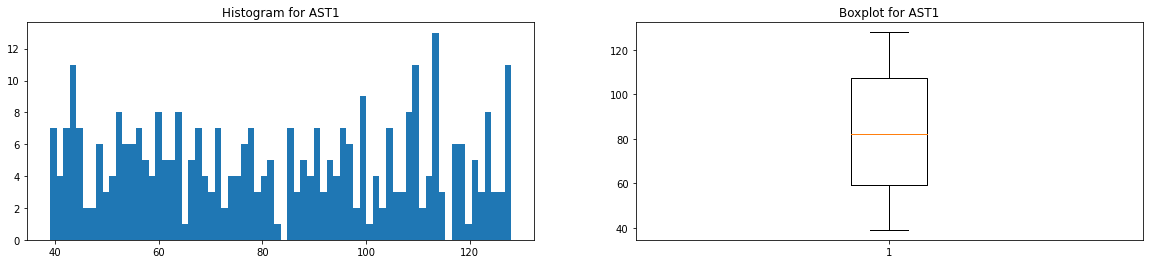

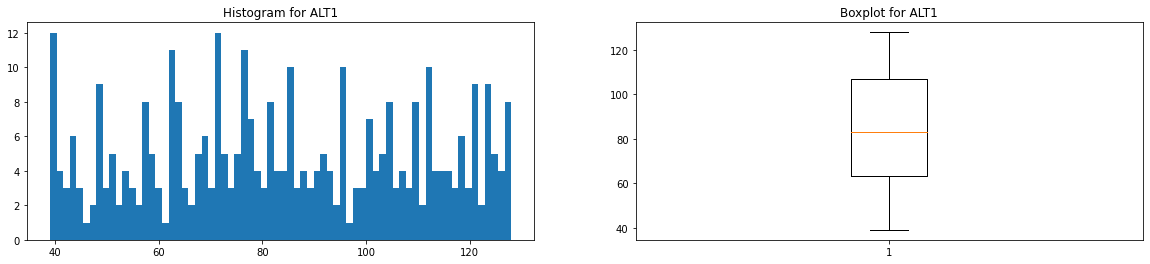

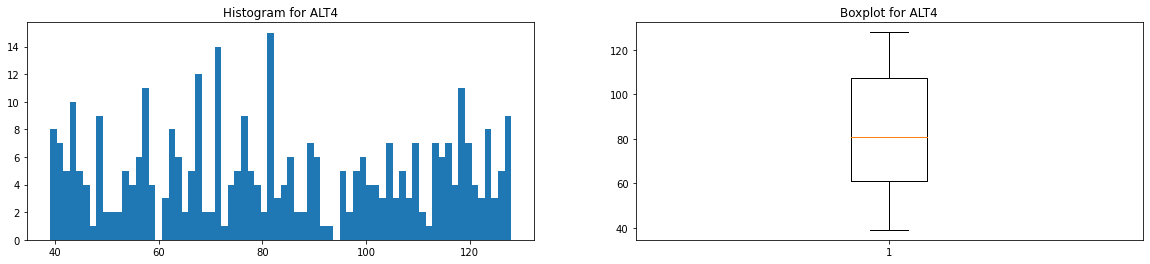

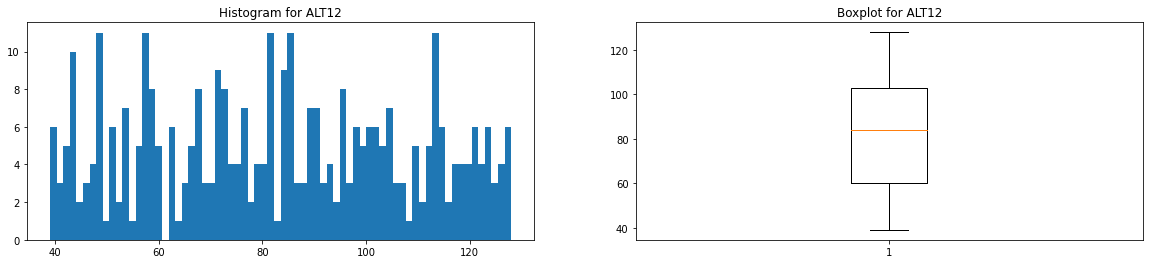

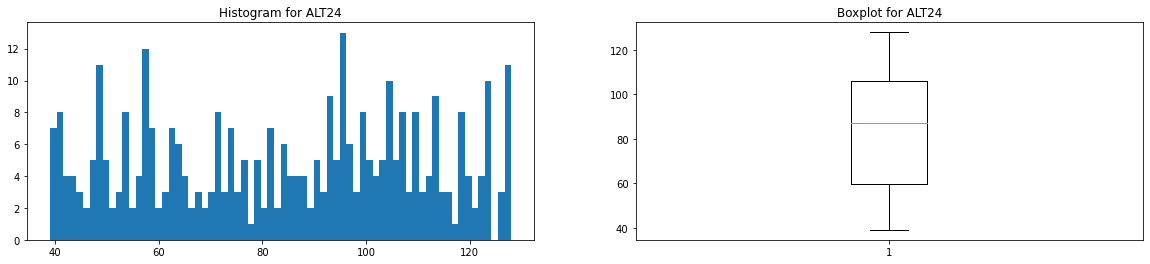

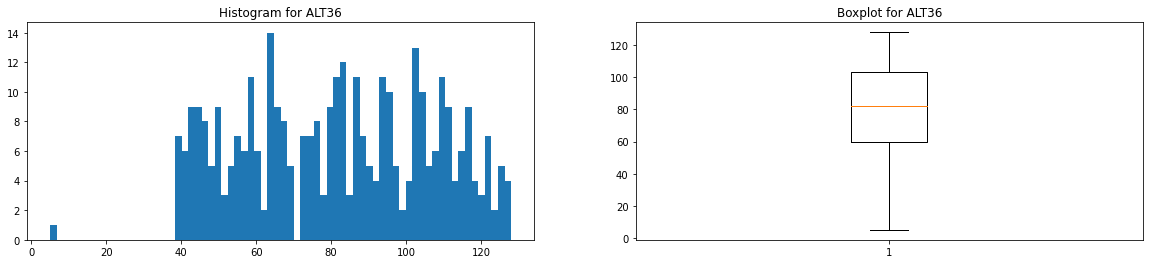

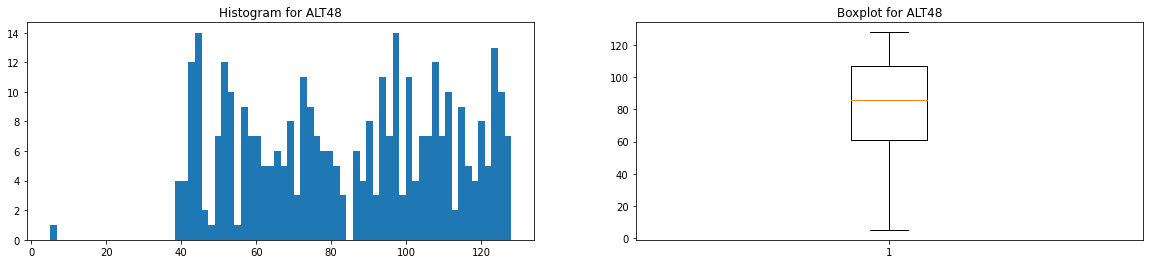

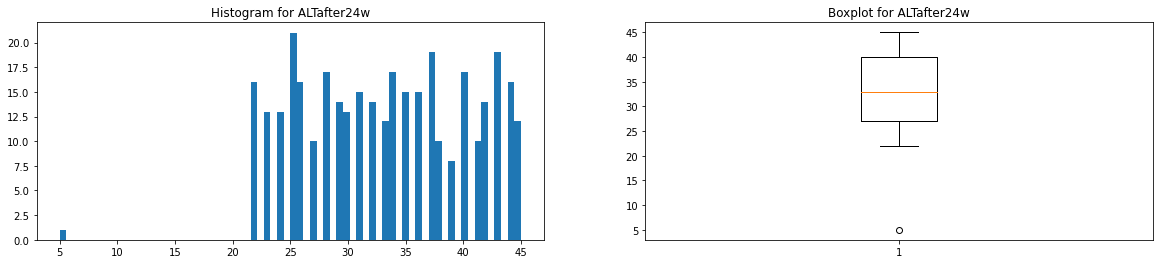

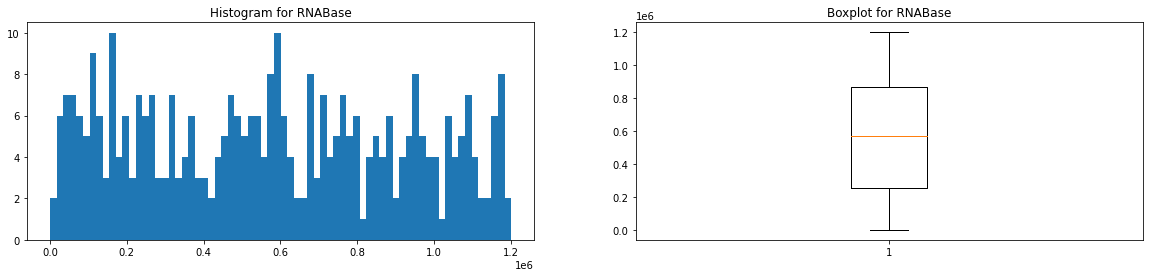

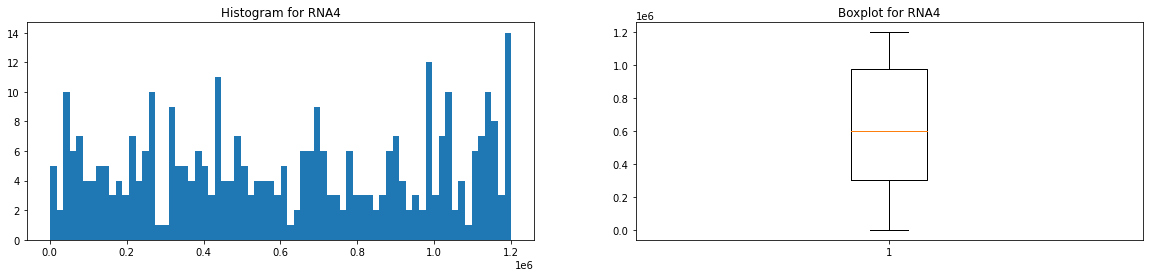

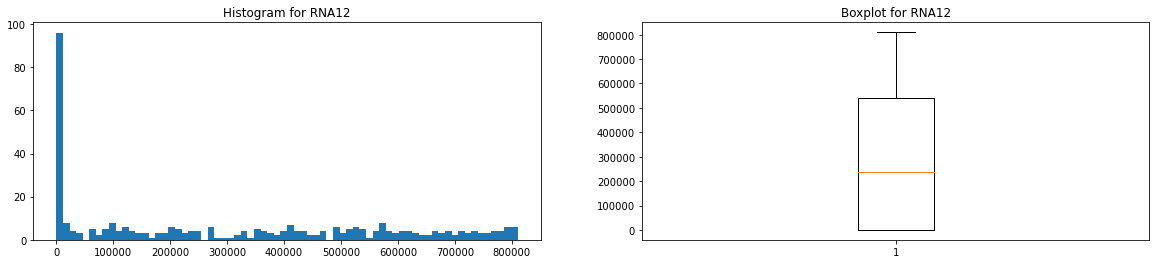

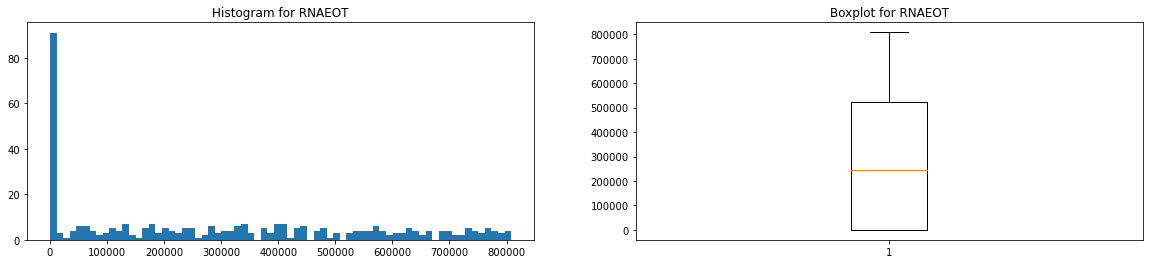

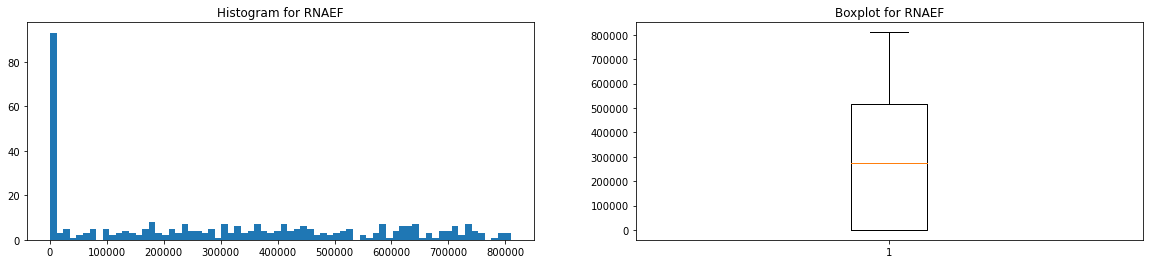

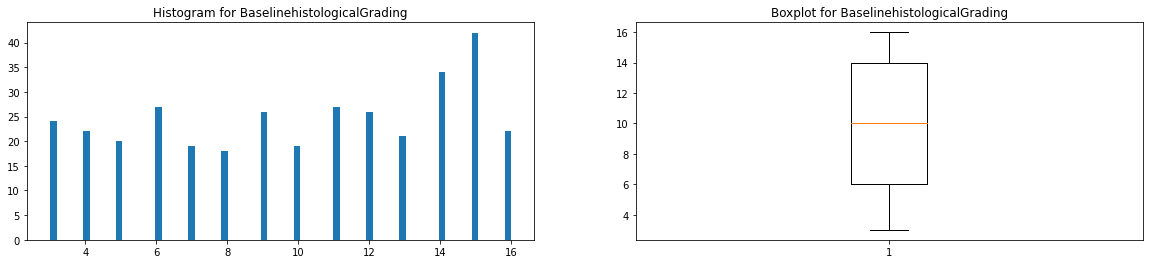

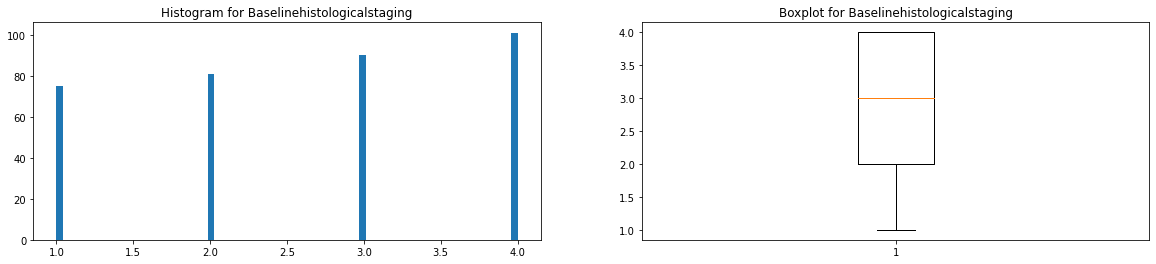

In [31]:
# Individualized histograms and boxplots for the test set.
print_boxplots_hist(headers, X_test)

#### c) Plot scatter plots

Since we have plenty of features available in both sets, the plotting of the scatterplot would be carried out right after observing the correlation between features. In this sense, it became easier to select variables that are worthy to visualize in this kind of plots.

## 6.- Correlation

The correlation between different features will allow to gain a better perspective of which variables are more related between themselves and could help us to carry out some future analysis. However, the only set used will be the training one, since the test one contains sample that should be still *'unknown'* and thus the relationship between the features of these samples cannot be studied if the samples are not available yet.

#### Plotting the dispersion matrix

<AxesSubplot:>

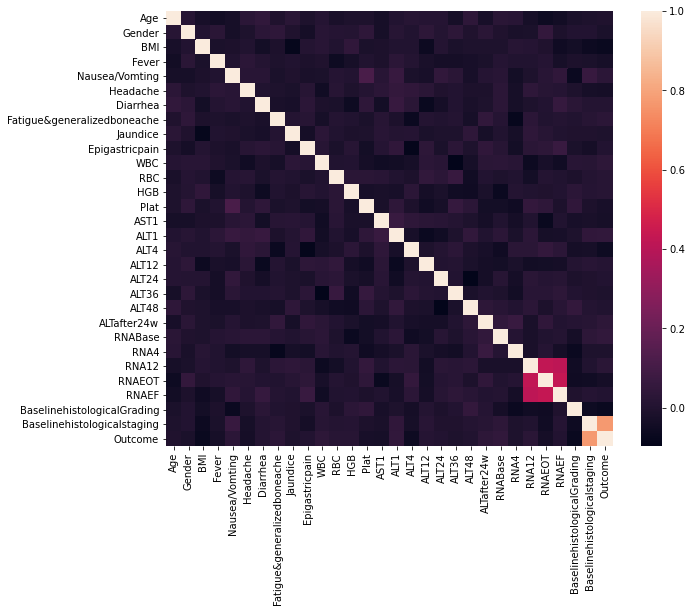

In [32]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train.corr()
# ammot = False, to make the plot more simple and understandable.
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Pearson coefficient (for continuous variables).

In [33]:
X_train.corr()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome
Age,1.000000,0.018518,-0.024879,-4.087157e-02,-0.029929,0.030089,0.048669,-0.003243,2.683726e-02,-0.006983,...,0.040155,-0.026096,0.024086,0.022564,-0.030967,-0.054172,-0.044210,-0.015015,-0.008306,-0.006113
Gender,0.018518,1.000000,0.004914,2.508540e-02,-0.028675,-0.007909,0.029490,0.036449,-3.854144e-03,-0.032464,...,-0.005703,0.023777,-0.003963,-0.019303,-0.016651,0.051092,-0.013150,0.002754,0.002684,-0.018820
BMI,-0.024879,0.004914,1.000000,-1.639966e-02,-0.012815,0.000859,-0.037422,-0.013904,-8.350478e-02,0.008187,...,-0.010614,-0.009672,-0.009339,0.018719,0.011795,-0.006106,-0.051344,-0.040433,-0.061032,-0.070135
Fever,-0.040872,0.025085,-0.016400,1.000000e+00,-0.001953,0.030853,0.009576,-0.009616,2.139162e-18,-0.013523,...,-0.025656,-0.015847,0.013163,0.001499,0.001034,0.011682,-0.030380,-0.013618,-0.016346,-0.029984
Nausea/Vomting,-0.029929,-0.028675,-0.012815,-1.952951e-03,1.000000,0.023281,0.020766,-0.017213,-3.853915e-03,-0.021434,...,-0.026356,0.013111,0.022339,-0.037218,-0.006569,0.020574,0.042105,-0.062479,0.062684,0.029936
Headache,0.030089,-0.007909,0.000859,3.085291e-02,0.023281,1.000000,0.000379,-0.007819,-1.734220e-02,0.015618,...,-0.011801,-0.011336,0.031265,-0.029534,0.036731,0.015424,0.014462,-0.006941,-0.029163,-0.035493
Diarrhea,0.048669,0.029490,-0.037422,9.575955e-03,0.020766,0.000379,1.000000,-0.020891,-2.698943e-02,0.028353,...,-0.022288,-0.009576,0.031352,-0.030416,-0.010713,0.004904,0.061612,0.026966,0.007544,0.009889
Fatigue&generalizedboneache,-0.003243,0.036449,-0.013904,-9.615813e-03,-0.017213,-0.007819,-0.020891,1.000000,7.707487e-03,0.017512,...,-0.028965,0.045903,0.014162,-0.077576,0.029161,0.000899,0.007080,0.000456,0.016393,0.030012
Jaundice,0.026837,-0.003854,-0.083505,2.139162e-18,-0.003854,-0.017342,-0.026989,0.007707,1.000000e+00,-0.034687,...,0.038384,-0.029643,0.000486,-0.029461,0.036882,0.016383,-0.001883,-0.002174,-0.003439,-0.006662
Epigastricpain,-0.006983,-0.032464,0.008187,-1.352295e-02,-0.021434,0.015618,0.028353,0.017512,-3.468730e-02,1.000000,...,-0.010320,0.041256,0.016859,-0.037098,0.023586,0.035243,0.068810,-0.017732,-0.035358,0.005495


##### Conclusion: 
    Now that the variables "RNA12", "RNAEOT" and "RNAEF" have shown to have a strong relationship between themselves, it is time to do some plotting to check what conclusions can be drawn.

    On the other hand, the variables 'Baselinehistologicalstaging' and 'Outcome' have an even stronger relationship, but this is only the result of creating the variable 'Outcome' from 'Baselinehistologicalstaging'.

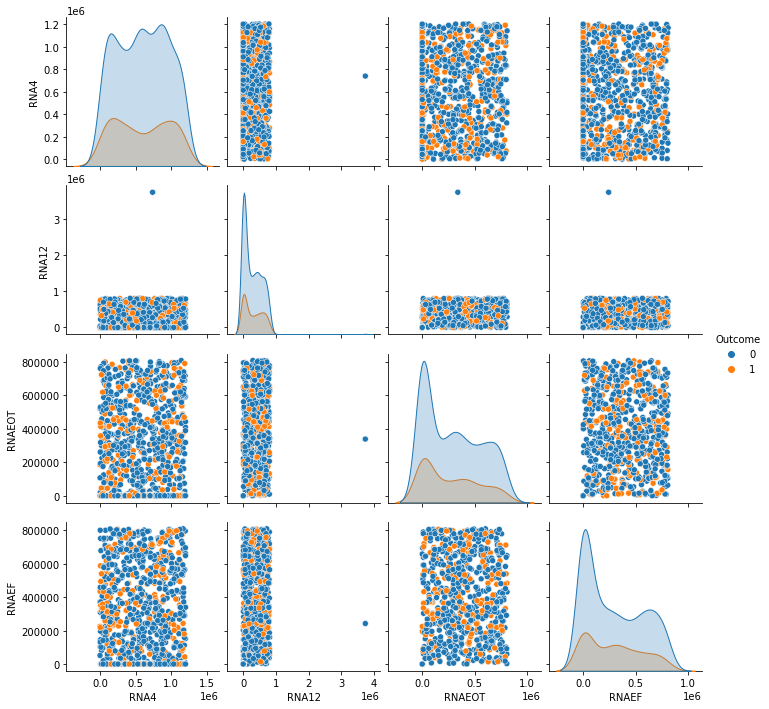

In [34]:
sns.pairplot(X_train, x_vars=["RNA4", "RNA12", "RNAEOT", "RNAEF"],
    y_vars=["RNA4", "RNA12", "RNAEOT", "RNAEF"], hue="Outcome");

##### Conclusion: 
        The value of the viral RNA tends to always be higher in patients that do not suffer from Cirrhosis yet than in those with the condition. This result makes sense because Cirrhosis is a condition commonly developed after many years of bearing HCV, not immediately after the infection (the blue color contains those patients that have already developed some liver complications but who are not yet reached the Cirrhotic stage). 

#### Chi-square (for categorical variables).

As we can see below we have a categorical variable in a pandas Series but it is necessary to create a '[contingency table](https://courses.lumenlearning.com/odessa-introstats1-1/chapter/contingency-tables/)' for applying the Chi-square test of independence of variables. However, it is important to highlight that this is a test for checking the independence of different categories of a population and that this test is only meaningful when the dimensions of the table is two or more. 

Applying the test to a one-dimensional table will always result in expected equal to observed and a chi-square statistic equal to 0. Therefore, we need to first create a contingency table and then look for another method to answer the question below.

We wanted to address the question:
##### Is it equally likely to have the same distribution in every type of stage (without considering the No Cirrhosis status)?

In [35]:
# Type of the variable 'Histologicalstaging'
type(X_train.Histologicalstaging)

pandas.core.series.Series

In [36]:
# Representing the number of samples in each category.
categ_count = X_train['Histologicalstaging'].value_counts()
print(X_train['Histologicalstaging'].value_counts()) 

#The array below contains the number of samples affected by each one of the Cirrhosis stages (exception made for 'NoFibrosis').
obs = np.array([int(categ_count[0]), int(categ_count[1]), int(categ_count[2]), int(categ_count[3])])
print('The observation array: ', obs)

ManySepta         265
Cirrhosis         261
PortalFibrosis    261
FewSepta          251
NoFibrosis          0
Name: Histologicalstaging, dtype: int64
The observation array:  [265 261 261 251]


Until now we have the categories of the different stages in an array that can be represented by the following table:

Stages  | Cirrhosis | ManySepta | PortalFibrosis |  FewSepta 
------------- | ------------- | ------------- | ------------- | -------------
Number of samples  | 281 | 263 | 249 | 245

Moreover, an extra row was added in our one-dimensional matrix containing the number of each type of Cirrhosis stage so that the previous array was converted into the one shown below. Since we want to check an equal distribution of the population in each stage, this new row would have the *expected number of samples* that the distribution would have if it was 'equally distributed'.

In [37]:
#Number of expected counts if the distribution is equal.
list_obs = obs.tolist()
expect_counts = sum(list_obs)/4
obs = np.vstack([obs, [expect_counts, expect_counts, expect_counts, expect_counts]])
print('New array: ', obs)

New array:  [[265.  261.  261.  251. ]
 [259.5 259.5 259.5 259.5]]


Now, the new array looks like has the same structure of the following table:

Stages  | Cirrhosis | ManySepta | PortalFibrosis |  FewSepta 
------------- | ------------- | ------------- | ------------- | -------------
Number of samples  | 281 | 263 | 249 | 245
Number of expected samples | 259.5 | 259.5 | 259.5 | 259.5 

Now, since we have a one-way table, applying the chi2_contingency method to make the Chi-square test of independence of variables in a contingency table, is not the approach to solve the question. Instead, the '[chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)' function would be employed. This function performs Chi-Square Goodness of Fit Test, the type of test suitable for one-way tables. Hence, what the chi-square test checks is the null hypothesis that this categorical data has the given frequencies.

In this case, the *null hypothesis* is that there is the same number of samples in each Cirrhosis stage and the *alternative hypothesis* is that there is not the same number of samples in each Cirrhosis stage.


In [38]:
chisq, pvalue = stats.chisquare(f_obs=obs[0], f_exp=obs[1])
print('The chi-squared test statistic is:', chisq, 'and the p value is:',pvalue)

The chi-squared test statistic is: 0.4123314065510597 and the p value is: 0.9376834984404799


Since the p value is much higher than 0.05, the null hypothesis failed to be rejected the null hypothesis which implies that indeed the number of samples in each category is more or less the same.

## 7.- Basics of Grouping

By implementing this grouping, we can find the most relevant features to work with.

In [39]:
X_train.groupby(['Outcome', 'Gender']).mean()

Age        BMI     Fever  Nausea/Vomting  Headache  \
Outcome Gender                                                             
0       1       46.058824  28.618926  1.506394        1.521739  1.506394   
        2       46.556995  28.829016  1.512953        1.474093  1.502591   
1       1       46.284672  28.299270  1.437956        1.518248  1.474453   
        2       46.072581  27.790323  1.516129        1.548387  1.451613   

                Diarrhea  Fatigue&generalizedboneache  Jaundice  \
Outcome Gender                                                    
0       1       1.498721                     1.468031  1.498721   
        2       1.528497                     1.505181  1.505181   
1       1       1.510949                     1.503650  1.510949   
        2       1.540323                     1.540323  1.475806   

                Epigastricpain          WBC  ...      ALT36      ALT48  \
Outcome Gender                               ...                         
0       1             1.539642  7484.649616  ...  83.337596  84.549872   
        2             1.474093  7582.445596  ...  84.266839  82.279793   
1       1             1.481752  7667.664234  ...  81.299270  80.686131   
        2             1.548387  7846.306452  ...  85.725806  86.274194   

                ALTafter24w        RNABase           RNA4          RNA12  \
Outcome Gender                                                             
0       1         33.069054  595516.450128  611961.071611  286893.040921   
        2         33.668394  579007.818653  583103.344560  276542.308290   
1       1         34.102190  606198.072993  576674.386861  300835.036496   
        2         33.685484  646696.169355  606931.814516  294452.169355   

                       RNAEOT          RNAEF  BaselinehistologicalGrading  \
Outcome Gender                                                              
0       1       274239.698210  292513.710997                     9.879795   
        2       308537.466321  284917.686528                     9.818653   
1       1       268585.532847  293540.051095                     9.102190   
        2       272890.185484  288006.330645                     9.330645   

                Baselinehistologicalstaging  
Outcome Gender                               
0       1                          1.979540  
        2                          2.031088  
1       1                          4.000000  
        2                          4.000000  

[4 rows x 28 columns]

<AxesSubplot:xlabel='Gender', ylabel='WBC'>

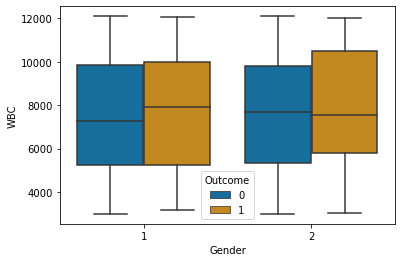

In [40]:
sns.boxplot(y='WBC', x='Gender',  
                 data=X_train, 
                 palette="colorblind",
                 hue='Outcome')

From the above plot it could be observed that somehow the White Blood Cells tends to be higher in patients with Cirrhosis.

## 8.- Dealing with missing values

#### a) Indicate which variables present null values and justify how you have identified them.

This specific database do not contain missing values and to prove it the following approaches were done.

In [41]:
# Checking if there are missing values
data.isnull().values.any()

False

In [42]:
# Adding up all the missing values of each column
data.isnull().sum()

Age                            0
Gender                         0
BMI                            0
Fever                          0
Nausea/Vomting                 0
Headache                       0
Diarrhea                       0
Fatigue&generalizedboneache    0
Jaundice                       0
Epigastricpain                 0
WBC                            0
RBC                            0
HGB                            0
Plat                           0
AST1                           0
ALT1                           0
ALT4                           0
ALT12                          0
ALT24                          0
ALT36                          0
ALT48                          0
ALTafter24w                    0
RNABase                        0
RNA4                           0
RNA12                          0
RNAEOT                         0
RNAEF                          0
BaselinehistologicalGrading    0
Baselinehistologicalstaging    0
Histologicalstaging            0
Outcome   

In [43]:
# Identify the number of '0' values per feature.
(data == 0).sum(axis=0)

Age                               0
Gender                            0
BMI                               0
Fever                             0
Nausea/Vomting                    0
Headache                          0
Diarrhea                          0
Fatigue&generalizedboneache       0
Jaundice                          0
Epigastricpain                    0
WBC                               0
RBC                               0
HGB                               0
Plat                              0
AST1                              0
ALT1                              0
ALT4                              0
ALT12                             0
ALT24                             0
ALT36                             0
ALT48                             0
ALTafter24w                       0
RNABase                           0
RNA4                              0
RNA12                             0
RNAEOT                            0
RNAEF                             0
BaselinehistologicalGrading 

In [44]:
# Identify the number of '0' values per observation (per patient).
(data == 0).sum(axis=1)

0       1
1       1
2       0
3       1
4       1
       ..
1380    0
1381    1
1382    1
1383    1
1384    1
Length: 1385, dtype: int64

##### Are all of them missing values?

No, zero values are only found in variable Outcome which indicates whether the patient has Cirrhosis or not (1 or 0).

##### What can we do?

We can eliminate these observations or we can replace them with a constant or with a statistic values.

#### b) Replace zeros with mean value

In [45]:
nonzero_mean = data[data != 0 ].mean()
print(nonzero_mean.round(3)) # Print the mean without missing values and rounding to avoid scientific notation

Age                                 46.319
Gender                               1.490
BMI                                 28.609
Fever                                1.516
Nausea/Vomting                       1.503
Headache                             1.496
Diarrhea                             1.503
Fatigue&generalizedboneache          1.499
Jaundice                             1.501
Epigastricpain                       1.504
WBC                               7533.386
RBC                            4422129.611
HGB                                 12.588
Plat                            158348.061
AST1                                82.775
ALT1                                83.916
ALT4                                83.406
ALT12                               83.510
ALT24                               83.709
ALT36                               83.118
ALT48                               83.630
ALTafter24w                         33.438
RNABase                         590951.219
RNA4       

Since there are no missing values in the whole database, there are also no missing values in neither the training nor the test set.

In [46]:
# Example given to replace zeros with mean values

# data['BMI'].replace([0],data['BMI'].mean(), inplace=True)

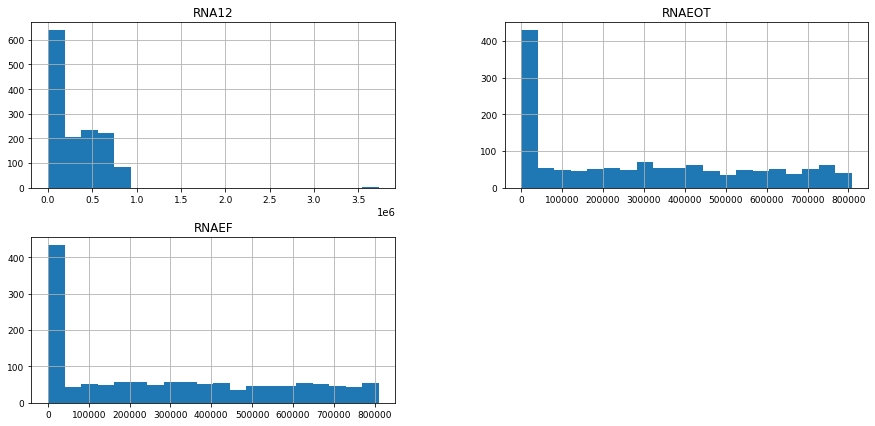

In [47]:
data.hist(column=['RNA12', 'RNAEOT', 'RNAEF'], figsize=(15, 7),
                   bins=20, xlabelsize=9, ylabelsize=9);

 In the case of RNA12, RNA end-of-treatment (RNAEOF) and RNA Elongation Factor (RNAEF), as we explained before, those variables can take values close to 0 as a result of a good response of the immune system to the treatment given (undetectable and unquantifiable levels of hepatits C virus RNA). Thus, those values are NOT interpreted as missing values or outliers and they will give us very important information related to the Outcome in further steps. 
 
 A further explanation regarding why the decline of viral RNA is an indicator of good response to the treatment could be found in the paper called '[Hepatitis C virus RNA kinetics during the initial 12 weeks treatment with pegylated interferon-alpha 2a and ribavirin according to virological response](https://pubmed.ncbi.nlm.nih.gov/16108761/)' written by Carlsson and colaborators.

## 9.- Dealing with outliers

##### a) Indicate which variables present anomalous values that could be eliminated and justify how you have identified them.

Histograms: thanks to the histograms, we can observe that the following variables have anomalous values that do not match the general behavior of the data.

- ALT36
- ALT48
- ALTafter24w
- RNA12

Boxplots: With this method, we will be able to only see the most outstanding outliers that are extremely far from the other values. Analyzing the boxplots of each of the variables, we can confirm that the following variables present relevant outliers.

- ALTafter24w
- RNA12


##### a) Identifying outliers with Histograms

Thanks to the histograms, we can observe that the following variables have anomalous values that do not match the general behavior of the data.

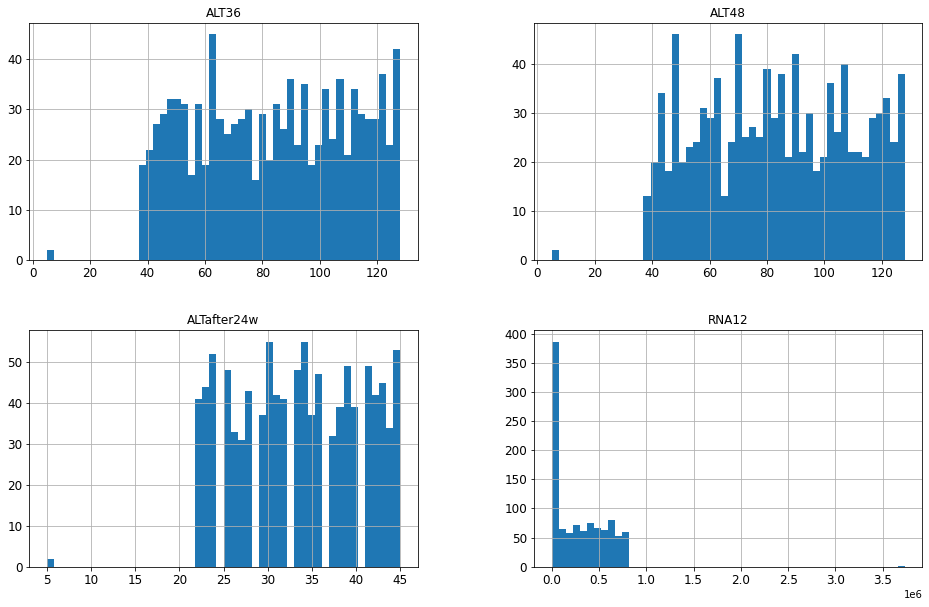

In [48]:
X_train.hist(column=['ALT36', 'ALT48', 'ALTafter24w', 'RNA12'], figsize=(16, 10),
                   bins=50, xlabelsize=12, ylabelsize=12);

##### b) Identifying outliers with Boxplots

With this method, we will be able to only see the most outstanding outliers that are extremely far from the other values. Analyzing the boxplots of each of the variables, we can confirm that the following variables present relevant outliers.

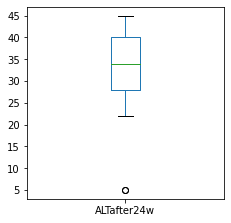

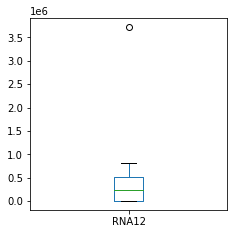

In [49]:
X_train['ALTafter24w'].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

X_train['RNA12'].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

#### c) Identifying Outliers with Interquartile Range

In [50]:
# Define the Quartiles and calculate the IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [51]:
def outliers_iqr(headers):
    
    for header in headers:
        
        # Calculate the bounds
        lower_bound = Q1[header]-(1.5*IQR[header])
        upper_bound = Q1[header]+(1.5*IQR[header])
        
        # Identify the outliers below and above the bounds
        out1 = X_train[header].loc[data[header] < lower_bound].tolist()
        out2 = X_train[header].loc[data[header] > upper_bound].tolist()
        
        print()
        print(header.upper())
        
        print('Lower outliers:')
        print(out1)
        
        print('Upper outliers:')
        print(out2)

In [52]:
headers = ['ALTafter24w', 'RNA12']
outliers_iqr(headers)


ALTAFTER24W
Lower outliers:
[5, 5]
Upper outliers:
[]

RNA12
Lower outliers:
[]
Upper outliers:
[794351, 793701, 798473, 797451, 801981, 798555, 806109, 3731527, 798772, 793719, 798485, 794687, 787605, 787815, 791212, 805218, 787295, 797579, 798150, 787967, 798534, 789780, 797895, 805636]


#### The special case of RNA12

 As we can observe in the Boxplot made in a), the interquarantile range (IQR) of RNA12 is closer to the minimum value of the whole dataset. Thus, identifying outliers with this method  is not advisable in this case, because we will interpret the values above the Upper Quartile (Q3) that are closer to the maximum value of the dataset as outliers, while those values are still within the normal range of the dataset.

That is the reason why we can observe so many outliers for RNA12 using this method.

#### d) Identifying and eliminating outliers with z-score

However, the z-score is a more efficient method to identify outliers in the case of RNA12.

In [53]:
import pandas as pd
from scipy import stats

# Z-score will be used for each sample on the data set
z_scores = stats.zscore(X_train['BMI'])

# It is going to be considered 3 times the standard deviation
abs_z_scores = np.abs(z_scores)
no_outliers = (abs_z_scores < 3)
X_train = X_train[no_outliers]

def outliers_zscore(headers):
    
    for header in headers:
        
        # Identify outliers
        z_scores1 = stats.zscore(X_train[header])
        abs_z_scores1 = np.abs(z_scores1)
        outliers1 = (abs_z_scores1 > 2)

        # Boxplot and mean with outliers
        print()
        print(header.upper())
        print(np.where(outliers1)[0]) # Print the positions of the outliers
        print()
        print('Mean with outliers:')
        print(X_train[header].mean())
        print()

        plt.figure(figsize = (12,4))
        ax1 = plt.subplot(1,2,1)
        ax1.boxplot(X_train[header])
        ax1.set_title('Boxplot ' + header + ' with outliers ')

        # Boxplot and mean without outliers
        print('Mean without outliers:')
        outl = ~(outliers1) #Invert the boolean array of outliers
        mean = X_train[header].iloc[outl.tolist()].mean() # Calculate the mean without the outliers
        print(mean)

        # We are considering that the outliers are samples of the dataset that belong to erroneous data. 
        # Thus, we are not taking into account those values for the calculation of the mean of the variable.

        # Replacing the outliers for the mean value
        X_train[header] = X_train[header].where(~(outliers1), mean)
        
        ax2 = plt.subplot(1,2,2)
        ax2.boxplot(X_train[header])
        ax2.set_title('Boxplot ' + header + ' without outliers ')
        plt.show()
        plt.show()


ALT36
[176 438]

Mean with outliers:
83.69942196531792

Mean without outliers:
83.85135135135135


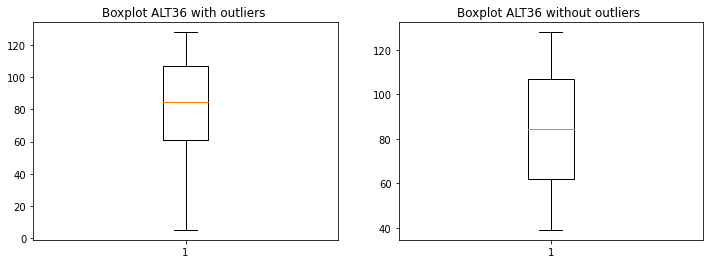


ALT48
[176 438]

Mean with outliers:
83.40173410404624

Mean without outliers:
83.5530888030888


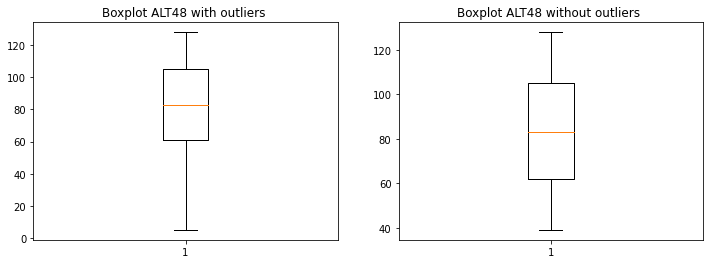


ALTAFTER24W
[176 438]

Mean with outliers:
33.5019267822736

Mean without outliers:
33.55694980694981


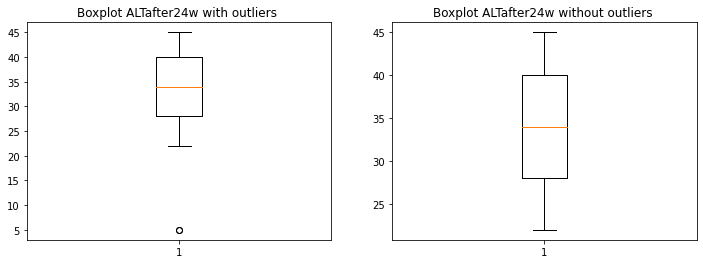


RNA12
[480]

Mean with outliers:
285787.07032755297

Mean without outliers:
282464.2738669238


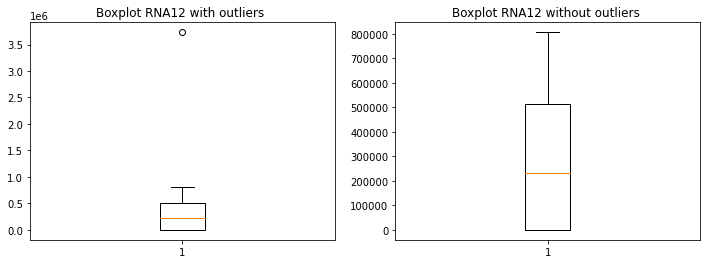

In [54]:
headers = ['ALT36', 'ALT48', 'ALTafter24w', 'RNA12']
outliers_zscore(headers)

## 10.- Dealing with imbalance classes

This occurs when the number of samples in one class is much higher than the number of samples in the another class. 

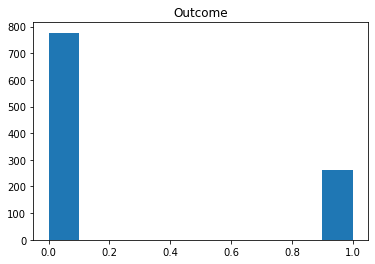

In [55]:
# The variable 'Outcome' indicates whether the patient has Cirrhosis or not (1 or 0).
plt.hist(X_train['Outcome'])
plt.title('Outcome')
plt.show()

#### a) Random Oversampling 
Randomly duplicate examples in the minority class. This method was selected because it was considered as the more appropiate in order to continue analyzing data without losing information of any sample.

Counter({1: 777, 0: 777})


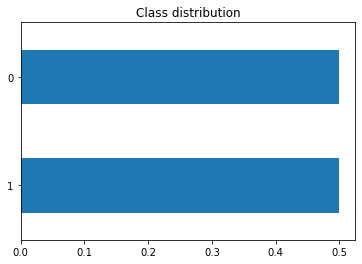

In [56]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Define Oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train[X_train.columns.difference(['Outcome','col'])], X_train.loc[:,'Outcome'])

# Summarize the new class distribution
class_distribution = pd.Series(y_over).value_counts(normalize = True)
ax = class_distribution.plot.barh()
ax.set_title("Class distribution")

print(Counter(y_over))

Changing the dataframe X_train and now the 'Outcome' column will have the result of the oversampling. Therefore, this variable will be already balanced in the training test which is important for the training of the future algorithm.

In [57]:
# This way of inserting the Outcome values assures that they will be inserted in the right place where they should be.
X_over['Outcome'] = pd.Series(y_over.values.tolist(), index = y_over.index.tolist())
X_train = X_over

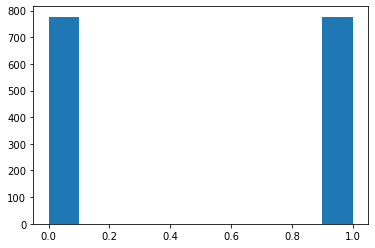

In [58]:
plt.hist(X_train['Outcome']);

## 11.- One-hot Encoding

A one-hot encoding transformation would be applied to the 'Histological Staging' variable in such a way that this categorical variable is transformed into a group of numerical variables that enables future data processing.

In [59]:
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# One-hot encoding for the training set.
enc_X_train = pd.DataFrame(enc.fit_transform(X_train[['Histologicalstaging']]).toarray())

# Identify categories.
print(X_train['Histologicalstaging'].value_counts())

# A table describing each different cirrhotic stage in the training set is created below.
enc_X_train.describe()

Cirrhosis         777
ManySepta         265
PortalFibrosis    261
FewSepta          251
NoFibrosis          0
Name: Histologicalstaging, dtype: int64


,0,1,2,3
count,1554.000000,1554.000000,1554.000000,1554.000000
mean,0.500000,0.161519,0.170528,0.167954
std,0.500161,0.368127,0.376217,0.373945
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [60]:
# Performing one-hot encoding.
Histologicalstaging_onehot = pd.get_dummies(X_train.Histologicalstaging, prefix='Staging')

# Visualizing the first rows to make sure the encoding was succesfully done.
print(Histologicalstaging_onehot .head())

histoarray = Histologicalstaging_onehot.to_numpy()

   Staging_NoFibrosis  Staging_PortalFibrosis  Staging_FewSepta  \
0                   0                       0                 0   
1                   0                       0                 0   
2                   0                       1                 0   
3                   0                       1                 0   
4                   0                       1                 0   

   Staging_ManySepta  Staging_Cirrhosis  
0                  0                  1  
1                  1                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0  


Adding an extra column to the training dataframe for each category inside the 'Histologicalstaging' variable, so that the information inside 'Histologicalstaging' is contained inside the other variables. 

In [61]:
X_train = pd.concat([data,pd.get_dummies(X_train['Histologicalstaging'], prefix='Staging')], axis=1) #Add new features in the previous database.
X_train.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome,Staging_NoFibrosis,Staging_PortalFibrosis,Staging_FewSepta,Staging_ManySepta,Staging_Cirrhosis
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1554.0,1554.000000,1554.000000,1554.000000,1554.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,287660.336462,291378.290975,9.761733,2.536462,0.261372,0.0,0.167954,0.161519,0.170528,0.500000
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,264559.525070,267700.691713,4.023896,1.121392,0.439541,0.0,0.373945,0.368127,0.376217,0.500161
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,3.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,251376.000000,244049.000000,10.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,517806.000000,527864.000000,13.000000,4.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,808450.000000,810333.000000,16.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [62]:
# One-hot encoding for the test set.

enc_X_test = pd.DataFrame(enc.fit_transform(X_test[['Histologicalstaging']]).toarray())

# Identifity categories
print(X_test['Histologicalstaging'].value_counts()) 

# A table describing each different cirrhotic stage in the test set is created below.
enc_X_test.describe()

Cirrhosis         101
ManySepta          90
FewSepta           81
PortalFibrosis     75
NoFibrosis          0
Name: Histologicalstaging, dtype: int64


,0,1,2,3
count,347.000000,347.000000,347.000000,347.000000
mean,0.291066,0.233429,0.259366,0.216138
std,0.454910,0.423624,0.438920,0.412204
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [63]:
# Performing one-hot encoding.
Histologicalstaging_onehot = pd.get_dummies(X_test.Histologicalstaging, prefix='Staging')

# Visualizing the first rows to make sure the encoding was succesfully done.
print(Histologicalstaging_onehot .head())

histoarray = Histologicalstaging_onehot.to_numpy()

      Staging_NoFibrosis  Staging_PortalFibrosis  Staging_FewSepta  \
1230                   0                       1                 0   
812                    0                       0                 0   
297                    0                       0                 1   
212                    0                       0                 1   
649                    0                       0                 0   

      Staging_ManySepta  Staging_Cirrhosis  
1230                  0                  0  
812                   0                  1  
297                   0                  0  
212                   0                  0  
649                   1                  0  


Adding an extra column to the test dataframe for each category inside the 'Histologicalstaging' variable, so that the information inside 'Histologicalstaging' is contained inside the other variables. 

In [64]:
X_test = pd.concat([data,pd.get_dummies(X_test['Histologicalstaging'], prefix='Staging')], axis=1) #Add new features in the previous database.
X_test.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome,Staging_NoFibrosis,Staging_PortalFibrosis,Staging_FewSepta,Staging_ManySepta,Staging_Cirrhosis
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,347.0,347.000000,347.000000,347.000000,347.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,287660.336462,291378.290975,9.761733,2.536462,0.261372,0.0,0.216138,0.233429,0.259366,0.291066
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,264559.525070,267700.691713,4.023896,1.121392,0.439541,0.0,0.412204,0.423624,0.438920,0.454910
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,3.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,251376.000000,244049.000000,10.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,517806.000000,527864.000000,13.000000,4.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,808450.000000,810333.000000,16.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


## 12.- Normalization

#### a) Standardization

By applying standardization, each column will have mean  0 and the standard deviation 1. This method was selected because its results were thought to be the easiest to intepret and analyze.

The normalization will be done using only the average of the training subset and applying it on the test subset.

For applying normalization, the categorical variables (already converted to continuous ones through one-hot encoding) must be first eliminated.

In [65]:
X_train1 = X_train.drop(labels='Histologicalstaging', axis=1)
X_test1 = X_test.drop(labels='Histologicalstaging', axis=1)

It is going to be used the mean and the standard desviation of the training set, to normalize the test set. In a real scenario, the test set it not known in advance.

In [66]:
from sklearn.preprocessing import StandardScaler

# Normalize variables using Standardization.
scaler = StandardScaler()
scaler.fit(X_train1)
X_train_norm = scaler.transform(X_train1)
X_test_norm = scaler.transform(X_test1) 

# Unit II

#### Note: the goal with this dataset is to predict, based on diagnostic measurements, whether a patient has Cirrhosis or not. However, in this unit, we will deal with a regression task, therefore, the output will be changed.

## 1. Cross-validation

The cross-validation was decided to be performed in this stage of the project since it was the last step of Unit I and the first step of Unit II. Moreover, among the three different options available, after testing, it was proven to be more efficient the Cross validation - KFold which randomly divided the (training) set into k subsets of proportional size called 'folds'.

The other alternatives was to use 'Leave One Out', which is a good approach when your set has a small number of samples. However, the problem is that this method lead to having a small number of validation samples and as the dataset chosen has plenty of samples, this method was disregarded.

The last alternative was using 'Stratify k-fold' that is as good as the first one, the only change is that it divides the dataset into validation and training subsets of equal sizes, which means having too many validation samples and losing more training samples.

a) Indicate what a k-fold cross-validation scheme can be used for. 

It can be used for avoid overfitting of variables and to select the best features for our model. The fianl model will be designed with the parameter that minimizes the cost function in the validation set.

b) Justify reasonably which models will need to follow a cross-validation scheme. 

In every model where parameters must be extracted and selected so that a proper algorithm that best predicts the outcome is being created.

c) As discussed in the theoretical classes, it is common in health to have a different number of cases in each class (unbalanced classes). Taking into account the database of this practice, please explain in detail the figure of merit you would consider in order to analyze the results with different parametric schemes.

Scatterplots for visualization, $R^{2}$ and MSE for having a numeric and objective quantity regarding which one of the models is the best one.

#### First, lists to store the R^2 and MSE coefficients will be created, so that at the end of this unit the performance of each model will be evaluated.

In [67]:
r2_results=[]
mse_results=[]

Importing packages.

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection   
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm

Removing null values from the non-normalized but pre-processed training and test sets.

In [69]:
# For the training set.

#Since the null values are always at the bottom, the following approach to remove null values was applied.
total_rows_train = len(X_train1.index)
Number_null_values = X_train1.isnull().sum()
index_train = total_rows_train - Number_null_values[0]
X_train1 = X_train1.iloc[ 0: index_train , : ]

# For the test set.
total_rows_test = len(X_test1.index)
Number_null_values = X_test1.isnull().sum()
index_test = total_rows_test - Number_null_values[0]
X_test1 = X_test1.iloc[ 0:index_test, : ]

#### Separating the inputs (X's) and outputs (Y's) of the model from the previous *training* normalized data set.

In [70]:
#Define the input and output data (for the training and the test set).
#RNA12 is the dependent variable in this unit.
data_input_train = X_train1.drop(['RNA12'], axis=1)
data_output_train = X_train1['RNA12']

Showing the first rows of only the dataframe that is the input to our model. 

In [71]:
data_input_train.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome,Staging_NoFibrosis,Staging_PortalFibrosis,Staging_FewSepta,Staging_ManySepta,Staging_Cirrhosis
0,56.0,1.0,35.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,5.0,5.0,13.0,2.0,0.0,0,0,0,0,1
1,46.0,1.0,29.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,...,336804.0,31085.0,4.0,2.0,0.0,0,0,0,1,0
2,57.0,1.0,33.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,735945.0,558829.0,4.0,4.0,1.0,0,1,0,0,0
3,49.0,2.0,33.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,...,744463.0,582301.0,10.0,3.0,0.0,0,1,0,0,0
4,59.0,1.0,32.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,338946.0,242861.0,11.0,1.0,0.0,0,1,0,0,0


Displaying the pandas series that it the output of the models

In [72]:
data_output_train.head()

0     288194.0
1     637056.0
2          5.0
3     585688.0
4    3731527.0
Name: RNA12, dtype: float64

Dividing the input of the model into the training and validation subsets. Partition is made by keeping 25% of samples in the validation subset, and the rest in the training one.

In [73]:
X_train_train, X_test_train, Y_train_train, Y_test_train = train_test_split(data_input_train, 
                                                            data_output_train, test_size=0.25, random_state = 20)

Displaying the first rows of the training subset.

In [74]:
X_train_train.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome,Staging_NoFibrosis,Staging_PortalFibrosis,Staging_FewSepta,Staging_ManySepta,Staging_Cirrhosis
1052,52.0,1.0,33.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,...,602681.0,694737.0,13.0,4.0,1.0,0,0,0,0,1
1201,35.0,1.0,29.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,...,512869.0,778006.0,8.0,2.0,0.0,0,0,0,0,1
296,54.0,2.0,24.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,806605.0,483906.0,4.0,4.0,1.0,0,0,1,0,0
476,45.0,2.0,32.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,...,272287.0,634583.0,8.0,3.0,0.0,0,1,0,0,0
523,47.0,2.0,33.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,799441.0,639670.0,3.0,1.0,0.0,0,0,0,1,0


#### Separating the inputs (X's) and outputs (Y's) of the model from the previous *test* normalized data set.

In [75]:
#Define the input and output data (for the training and the test set).
#RNA12 is the dependent variable in this unit.
data_input_test = X_test1.drop(['RNA12'], axis=1)
data_output_test = X_test1['RNA12']

In [76]:
data_input_test.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome,Staging_NoFibrosis,Staging_PortalFibrosis,Staging_FewSepta,Staging_ManySepta,Staging_Cirrhosis
0,56,1,35,2,1,1,1,2,2,2,...,5,5,13,2,0,NaN,NaN,NaN,NaN,NaN
1,46,1,29,1,2,2,1,2,2,1,...,336804,31085,4,2,0,NaN,NaN,NaN,NaN,NaN
2,57,1,33,2,2,2,2,1,1,1,...,735945,558829,4,4,1,NaN,NaN,NaN,NaN,NaN
3,49,2,33,1,2,1,2,1,2,1,...,744463,582301,10,3,0,0.0,0.0,0.0,1.0,0.0
4,59,1,32,1,1,2,1,2,2,2,...,338946,242861,11,1,0,NaN,NaN,NaN,NaN,NaN


In [77]:
data_output_test.head()

0     288194
1     637056
2          5
3     585688
4    3731527
Name: RNA12, dtype: int64

In [78]:
X_train_test, X_test_test, Y_train_test, Y_test_test = train_test_split(data_input_train, 
                                                            data_output_train, test_size=0.25, random_state = 42)

In [79]:
X_train_test.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome,Staging_NoFibrosis,Staging_PortalFibrosis,Staging_FewSepta,Staging_ManySepta,Staging_Cirrhosis
135,45.0,2.0,31.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,563142.0,766844.0,16.0,3.0,0.0,0,0,0,1,0
1035,39.0,1.0,27.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,...,225352.0,265038.0,11.0,1.0,0.0,0,0,1,0,0
374,39.0,1.0,23.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,...,5.0,5.0,10.0,3.0,0.0,0,0,0,1,0
624,46.0,2.0,35.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,...,389092.0,649028.0,4.0,3.0,0.0,0,0,0,1,0
567,41.0,2.0,29.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,...,5.0,5.0,14.0,2.0,0.0,0,0,0,0,1


## 2.- Linear regression

#### a) What is the dependent variable that you could consider addressing a linear regression problem?
It is the RNA 12 weeks. 

#### b) Which variable is the one that allows better estimation of the dependent variable?

The RNA Elongation factors which are a set of proteins that function at the ribosome, during protein synthesis, to facilitate translational elongation from the formation of the first to the last peptide bond of a growing polypeptide. These proteins associate with ribosomes cyclically during the elongation phase of protein synthesis, therefore, it can infered that these elongations factors will also depend on the amount of RNA available in plasma.

Moreover, the correlation coefficient between these two variables is not so small, it is around 0.5.

First, check the correlation of the pre-processed training data set.

<AxesSubplot:>

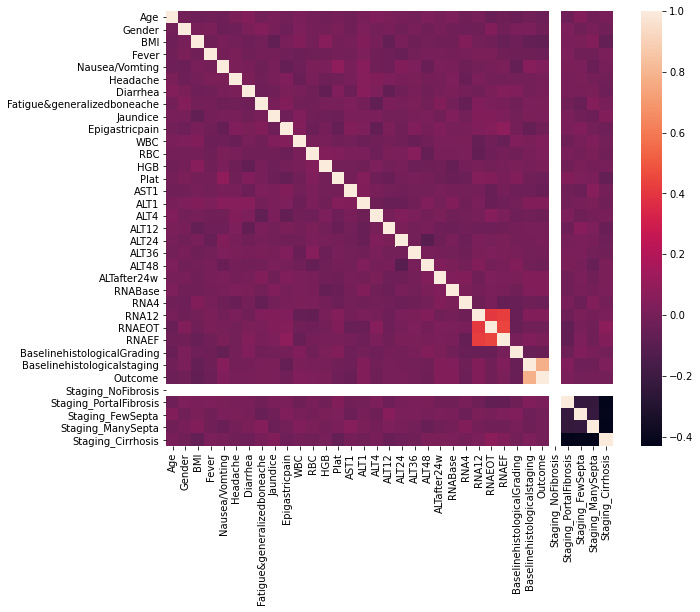

In [80]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train1.corr()
# ammot = False, to make the plot more simple and understandable.
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Using different methods to build a linear regression model.

In [81]:
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LinearRegression

def simplelinearregre(X_trainvar, X_testvar, Y_train, Y_test, xlabel, ylabel):
    
    print('USING SKLEARN')
    # Simple linear regression
    regressor = LinearRegression()

    #Train the model using the training set
    regressor = regressor.fit(np.array(X_trainvar).reshape(-1, 1), Y_train)
    #not adding the bias

    # Show the intercept
    print('The intercept of the model:', regressor.intercept_)

    # Show the coeffients
    print('The coefficient of the model:', regressor.coef_)

    #Predict using the test set
    y_pred = regressor.predict(np.array(X_testvar).reshape(-1,1))

    # Compute the MSE
    mse = metrics.mean_squared_error(Y_test, y_pred)
    mse_results.append(mse)

    # Compute the R2
    r_squared = metrics.r2_score(Y_test, y_pred)
    r2_results.append(r_squared)
    print(f'R Squared: {r_squared} \n Mean Squared Error:{mse}')


    # Plot the samples and the predict
    plt.scatter(X_testvar,Y_test,color='b')
    plt.plot(X_testvar, y_pred,color='r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    # Printing the summary.
    print('USING STATSMODELS')
    mod = sm.OLS(Y_train, X_trainvar) 
    res = mod.fit()
    display(res.summary())
    y_pre = res.predict(X_testvar)
    plt.scatter(X_testvar, Y_test, alpha=0.1)
    plt.plot(X_testvar, y_pre , 'r')
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.show()
    
    print('\n USING SCIPY')
    
    slope, intercept, r_value, p_value, std_err =stats.linregress(X_trainvar, Y_train)
    print("\n R-squared:", r_value**2)
    
    # Plot data points
    plt.scatter(X_trainvar, Y_train, color="red", marker="+")
    y_predict = intercept + slope*X_trainvar
    plt.plot(X_trainvar ,y_predict, color="blue")
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    

USING SKLEARN
The intercept of the model: 160114.46832675612
The coefficient of the model: [0.45794721]
R Squared: 0.17489836499452738 
 Mean Squared Error:57718200681.80158


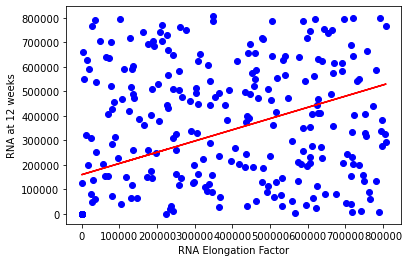

USING STATSMODELS


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  RNA12   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.523
Method:                 Least Squares   F-statistic:                              1141.
Date:                Sat, 16 Oct 2021   Prob (F-statistic):                   2.81e-169
Time:                        18:29:04   Log-Likelihood:                         -14514.
No. Observations:                1038   AIC:                                  2.903e+04
Df Residuals:                    1037   BIC:                                  2.903e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RNAEF          0.7570      0.022     33.776      0.000       0.713       0.801
==============================================================================
Omnibus:                      615.210   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24180.531
Skew:                           2.086   Prob(JB):                         0.00
Kurtosis:                      26.274   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

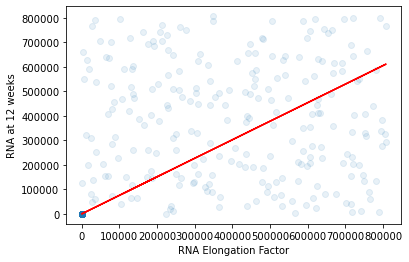


 USING SCIPY

 R-squared: 0.17514243397515886


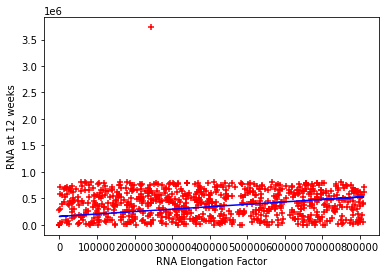

In [82]:
simplelinearregre(X_train_train['RNAEF'], X_test_train['RNAEF'], Y_train_train, Y_test_train,
                  'RNA Elongation Factor', 'RNA at 12 weeks')

#### Normalization of the Input Data.
The output data should keep the original measurements, and the validation set is normalized using data of the training set.

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalerfit = scaler.fit(X_train_train)
X_train_norm_train = scaler.transform(X_train_train)
X_test_norm_train = scaler.transform(X_test_train)


#After normalizing, the coefficient changes and also the speed beacuse sometimes the model could not converge.
# But distance of both features is the same, but coefficients adjust to new values of the variables.

In [84]:
#index = X_train_train.columns.get_loc('RNAEF')
index = X_train_train.columns.get_loc('Staging_PortalFibrosis')

USING SKLEARN
The intercept of the model: 294365.29479768785
The coefficient of the model: [-3532.75876435]
R Squared: -0.004799052355927147 
 Mean Squared Error:70288544935.89606


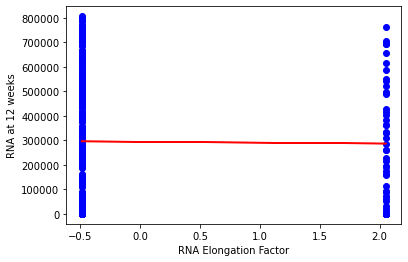

USING STATSMODELS


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  RNA12   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                            0.07538
Date:                Sat, 16 Oct 2021   Prob (F-statistic):                       0.784
Time:                        18:29:05   Log-Likelihood:                         -14899.
No. Observations:                1038   AIC:                                  2.980e+04
Df Residuals:                    1037   BIC:                                  2.980e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3532.7588   1.29e+04     -0.275      0.784   -2.88e+04    2.17e+04
==============================================================================
Omnibus:                      541.308   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13124.123
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                      20.014   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

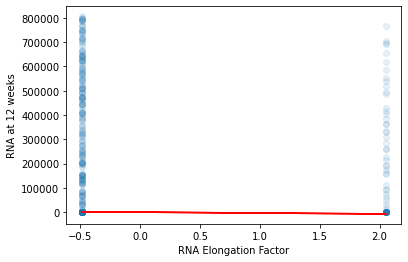


 USING SCIPY

 R-squared: 0.00014673141643398827


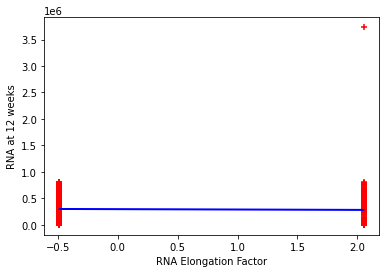

In [85]:
simplelinearregre(X_train_norm_train[:,index], X_test_norm_train[:,index], Y_train_train, Y_test_train, 
                  'RNA Elongation Factor', 'RNA at 12 weeks')

#### c) Indicate whether the performance obtained in the test set change after normalizing the variables.

After normalizing, performance remains the same, however, coefficients did change because as the distance of both features is the same, coefficients must adjust to the new values of the variables. Furthermore, the computational speed does change because sometimes models that could not converge now they can.

## 3. Multiple Linear Regresion

a) How the value of the estimators, the correlation coefficient and the performance measures change when we change the number of explanatory variables.

First, the estimators change because they have to adjust its values to the new inputs in order to compensate the lose, gain or scale change of the input values in order to continue displaying output values in the same units as always. Then, the correlation coefficients also change because according to the available input values, the algorithm calculates more or less the proportion that each of the features helps to predict the outcome. Fianlly, the performance improves when we normalize the variables and even more when we diminish the number of input features (computes a model using less computational resources).

b) The most relevant features. Explain in detail the process you have followed and justify which characteristics are most relevant to you in this database.

The 'RNA EOT' and 'RNA EF' because after normalizing the input variables, applying the linear regression model using the sklearn package, computing the Regression Results of the model, observing that the variables with a higher correlation coefficients were those two, then plotting the value of the model coefficients for each input feature, and obtaining a better $R^2$ coeeficient after performing the same calculations in another model that only takes as input 'RNA EOT' and 'RNA EF'; it was verified that indeed these features are the most relevants. Moreover, also the extremely low p values and confidence intervals that contains the zero of these variables in the normalized models demonstrate once more their relevance.

Note: you may have to repeat this section with a different number of variables in order to draw valid conclusions.

#### Using different methods to build a linear regression model.

In [86]:
def multiplelinearregre(X_train, X_test, Y_train, Y_test, labels):
    
    # Simple linear regression
    print('USING SKLEARN')
    regressor = LinearRegression()

    #Train the model using the training set
    regressor = regressor.fit(X_train, Y_train)

    # Show the intercept
    print('Intercept of the model:', regressor.intercept_, '\n')

    # Show the coeffients
    print('Coefficients of the model:', regressor.coef_)

    #Predict using the test set
    y_pred_mlr = regressor.predict(X_test)

    # Compute the MSE
    mse_mlr = metrics.mean_squared_error(Y_test, y_pred_mlr)
    mse_results.append(mse_mlr)

    # Compute the R2
    r_squared_mlr = metrics.r2_score(Y_test, y_pred_mlr)
    r2_results.append(r_squared_mlr)

    print(f'\n R Squared: {r_squared_mlr} \n Mean Squared Error:{mse_mlr} \n')
    
    x_coef = np.arange(regressor.coef_.shape[0])
    print('List of Nº of targets (from 0 to Nº of targets - 1): ', x_coef)

    #Plotting coefficients.
    import matplotlib.pyplot as plt  
    plt.plot(x_coef, abs(regressor.coef_) ,color='r', marker="o")
    plt.xticks(np.arange(regressor.coef_.shape[0]), labels, rotation=90,  fontsize=12)
    plt.xlabel('Features')
    plt.ylabel('Coefficient value')
    plt.grid()

        
    #Printting summary of the model.
    print('\n USING STATSMODELS')
    
    mod = sm.OLS(Y_train, X_train)
    res = mod.fit()
    display(res.summary())

First, we will try an approach with all the variables, when they are not normalized yet.

USING SKLEARN
Intercept of the model: 340643.6290923464 

Coefficients of the model: [ 1.05278640e+03 -2.74356221e+04  1.05539127e+03  1.93997527e+04
 -2.75665015e+04  2.19462146e+04 -1.80800190e+04  1.01343049e+04
  7.82352743e+03 -1.69072543e+04 -3.32600516e+00 -6.01058630e-02
  2.62264688e+03  2.40679794e-01  6.61168153e+01  3.64279139e+02
 -3.39420257e+02 -2.92831649e+02  2.48966008e+02  7.78039553e+01
  3.41177360e+02 -1.11954269e+03 -2.52281383e-02 -2.24501429e-02
  3.03350943e-01  3.28959830e-01 -2.95062715e+03  3.94948671e+03
  1.54028475e+04  0.00000000e+00  7.52271665e+03 -3.40538244e+03
  1.14744100e+04 -1.55917442e+04]

 R Squared: 0.19742713112811316 
 Mean Squared Error:56142249563.00026 

List of Nº of targets (from 0 to Nº of targets - 1):  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]

 USING STATSMODELS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RNA12   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     11.20
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           1.90e-47
Time:                        18:29:05   Log-Likelihood:                -14376.
No. Observations:                1038   AIC:                         2.882e+04
Df Residuals:                    1005   BIC:                         2.898e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Age                          1052.7864    905.350      1.163      0.245    -723.807    2829.380
Gender                      -2.744e+04    1.6e+04     -1.719      0.086   -5.87e+04    3878.587
BMI                          1055.3913   1954.195      0.540      0.589   -2779.378    4890.161
Fever                         1.94e+04    1.6e+04      1.209      0.227   -1.21e+04    5.09e+04
Nausea/Vomting              -2.757e+04   1.61e+04     -1.712      0.087   -5.92e+04    4027.096
Headache                     2.195e+04    1.6e+04      1.372      0.170   -9441.962    5.33e+04
Diarrhea                    -1.808e+04   1.61e+04     -1.123      0.262   -4.97e+04    1.35e+04
Fatigue&generalizedboneache  1.013e+04    1.6e+04      0.632      0.528   -2.14e+04    4.16e+04
Jaundice                     7823.5274    1.6e+04      0.488      0.626   -2.36e+04    3.93e+04
Epigastricpain              -1.691e+04   1.61e+04     -1.048      0.295   -4.86e+04    1.47e+04
WBC                            -3.3260      3.020     -1.101      0.271      -9.252       2.600
RBC                            -0.0601      0.023     -2.574      0.010      -0.106      -0.014
HGB                          2622.6469   4630.152      0.566      0.571   -6463.227    1.17e+04
Plat                            0.2407      0.208      1.158      0.247      -0.167       0.649
AST1                           66.1168    309.208      0.214      0.831    -540.650     672.883
ALT1                          364.2791    311.154      1.171      0.242    -246.308     974.866
ALT4                         -339.4203    302.061     -1.124      0.261    -932.162     253.322
ALT12                        -292.8316    313.061     -0.935      0.350    -907.161     321.497
ALT24                         248.9660    305.196      0.816      0.415    -349.929     847.861
ALT36                          77.8040    302.414      0.257      0.797    -515.632     671.240
ALT48                         341.1774    302.902      1.126      0.260    -253.216     935.571
ALTafter24w                 -1119.5427   1123.660     -0.996      0.319   -3324.532    1085.446
RNABase                        -0.0252      0.022     -1.129      0.259      -0.069       0.019
RNA4                           -0.0225      0.022     -1.012      0.312      -0.066       0.021
RNAEOT                          0.3034      0.033      9.133      0.000       0.238       0.369
RNAEF                           0.3290      0.033      9.833      0.000       0.263       0.395
BaselinehistologicalGrading -2950.6272   2008.847     -1.469      0.142   -6892.643     991.389
Baselinehistologicalstaging  3949.4867   1.14e+04      0.346      0.729   -1.84e+04    2.63e+04
Outcome                       1.54e+04   2.92e+04      0.527      0.598   -4.19e+04    7.27e+04
Staging_NoF

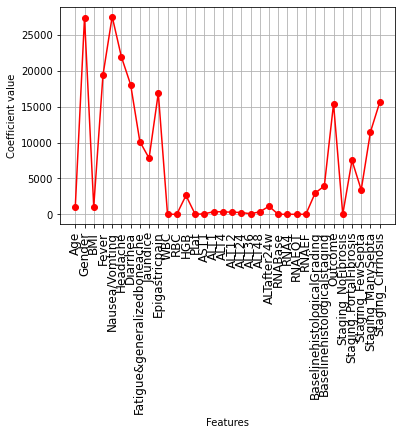

In [87]:
multiplelinearregre(X_train_train, X_test_train, Y_train_train, Y_test_train, data_input_train.columns)

#### Conclusion:
    It seems that the variables 'Gender' and 'Fever' make a huge impact in the model according to the graph, however, looking more in detail to the 'Regression Results', the more significant values according to their p values are 'RNAEF' and 'RNAEOT'. This problem occurs when we insert not normalized variables to the model.

Now, let's try inserting normalized input values.

USING SKLEARN
Intercept of the model: 294356.41444071796 

Coefficients of the model: [ 9.25003563e+03 -1.37454206e+04  4.35230127e+03  9.78285355e+03
 -1.37660089e+04  1.10928707e+04 -8.97262458e+03  5.07007228e+03
  3.87964885e+03 -8.48218995e+03 -8.66328227e+03 -2.06535446e+04
  4.53701185e+03  9.29849797e+03  1.72663922e+03  9.47950448e+03
 -9.02469533e+03 -7.51562177e+03  6.57500244e+03  2.05886268e+03
  9.02450993e+03 -7.98320064e+03 -9.03091720e+03 -8.07910298e+03
  8.12828495e+04  8.76724399e+04 -1.17915704e+04  4.45283965e+03
  6.76112443e+03  0.00000000e+00  2.10109736e+17  2.03833942e+17
  2.11704415e+17  2.64640728e+17]

 R Squared: 0.1971404648936188 
 Mean Squared Error:56162302679.548904 

List of Nº of targets (from 0 to Nº of targets - 1):  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]

 USING STATSMODELS


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  RNA12   R-squared (uncentered):                   0.130
Model:                            OLS   Adj. R-squared (uncentered):              0.103
Method:                 Least Squares   F-statistic:                              4.706
Date:                Sat, 16 Oct 2021   Prob (F-statistic):                    7.05e-16
Time:                        18:29:06   Log-Likelihood:                         -14826.
No. Observations:                1038   AIC:                                  2.972e+04
Df Residuals:                    1006   BIC:                                  2.988e+04
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9257.7127   1.23e+04      0.754      0.451   -1.48e+04    3.34e+04
x2         -1.371e+04   1.23e+04     -1.115      0.265   -3.78e+04    1.04e+04
x3          4331.4457   1.24e+04      0.350      0.726   -1.99e+04    2.86e+04
x4          9696.8330   1.24e+04      0.784      0.433   -1.46e+04     3.4e+04
x5         -1.378e+04   1.24e+04     -1.110      0.267   -3.81e+04    1.06e+04
x6          1.097e+04   1.23e+04      0.889      0.374   -1.32e+04    3.52e+04
x7         -9039.4054   1.24e+04     -0.728      0.467   -3.34e+04    1.53e+04
x8          5067.0020   1.24e+04      0.409      0.682   -1.92e+04    2.94e+04
x9          3911.6984   1.24e+04      0.316      0.752   -2.03e+04    2.82e+04
x10        -8453.4859   1.24e+04     -0.679      0.497   -3.29e+04     1.6e+04
x11        -8777.4587   1.23e+04     -0.714      0.475   -3.29e+04    1.53e+04
x12        -2.062e+04   1.24e+04     -1.668      0.096   -4.49e+04    3632.882
x13         4522.6452   1.23e+04      0.367      0.714   -1.96e+04    2.87e+04
x14         9357.7949   1.25e+04      0.751      0.453   -1.51e+04    3.38e+04
x15         1712.2848   1.24e+04      0.139      0.890   -2.25e+04     2.6e+04
x16         9437.8450   1.24e+04      0.759      0.448    -1.5e+04    3.38e+04
x17        -8993.5952   1.23e+04     -0.728      0.467   -3.32e+04    1.52e+04
x18        -7518.7541   1.24e+04     -0.606      0.544   -3.19e+04    1.68e+04
x19         6519.1246   1.23e+04      0.529      0.597   -1.77e+04    3.07e+04
x20         2045.6888   1.23e+04      0.167      0.868    -2.2e+04    2.61e+04
x21         9038.9185   1.24e+04      0.730      0.465   -1.53e+04    3.33e+04
x22        -7954.8044   1.23e+04     -0.646      0.519   -3.21e+04    1.62e+04
x23        -9001.5699   1.23e+04     -0.732      0.464   -3.31e+04    1.51e+04
x24        -8097.8660   1.23e+04     -0.656      0.512   -3.23e+04    1.61e+04
x25          8.13e+04   1.37e+04      5.921      0.000    5.44e+04    1.08e+05
x26         8.767e+04   1.38e+04      6.374      0.000    6.07e+04    1.15e+05
x27        -1.181e+04   1.24e+04     -0.952      0.341   -3.61e+04    1.25e+04
x28         4445.7669   1.98e+04      0.225      0.822   -3.44e+04    4.33e+04
x29         6757.1904   1.98e+04      0.342      0.733    -3.2e+04    4.56e+04
const      -4.088e-13   1.49e-12     -0.274      0.784   -3.34e-12    2.52e-12
x30         3721.1129   9686.493      0.384      0.701   -1.53e+04    2.27e+04
x31         -563.3865   9816.491     -0.057      0.954   -1.98e+04    1.87e+04
x32         5316.7454   9609.500      0.553      0.580   -1.35e+04    2.42e+04
x33        -6773.6483   8036.065     -0.843      0.399   -2.25e+04    8995.722
=============================================================

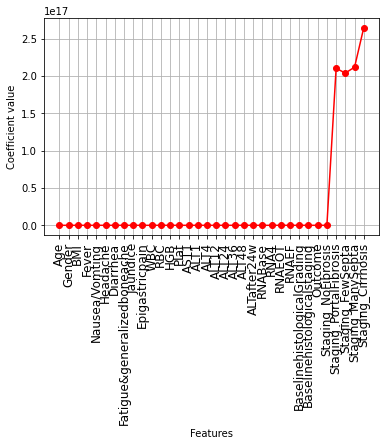

In [88]:
multiplelinearregre(X_train_norm_train, X_test_norm_train, Y_train_train, Y_test_train, data_input_train.columns)

#### Conclusion: CHANGE THIS CONCLUSION
    It seems that the variables that more reliably inferred the amount of viral RNA at the 12th week are 'RNAEOT' (RNA End-of-Treatment) and 'RNAEF' (RNA Elongation Factor). The previous results make sense since the HCV treatment lasts 18 moths, already in the 12 week, you can predict is the levels of RNA at the end of the treatment will decrease significantly or not. Moreover, since the Elongation Factor are a set of proteins which participate in the protein synthesis, the EF levels are directly affected by RNA plasma levels because without RNA, protein synthesis cannot be carried out.

Now, a model which only uses the normalized variables 'RNAEOT' and 'RNAEF' as input to the model since previously it was proven that this two are the most relevant features to predict RNA at the 12 week. 

USING SKLEARN
Intercept of the model: 294365.29479768785 

Coefficients of the model: [    0.         -3532.75876435]

 R Squared: -0.004799052355927147 
 Mean Squared Error:70288544935.89606 

List of Nº of targets (from 0 to Nº of targets - 1):  [0 1]

 USING STATSMODELS


C:\Users\pao_s\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  RNA12   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                            0.07538
Date:                Sat, 16 Oct 2021   Prob (F-statistic):                       0.784
Time:                        18:29:06   Log-Likelihood:                         -14899.
No. Observations:                1038   AIC:                                  2.980e+04
Df Residuals:                    1037   BIC:                                  2.980e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1         -3532.7588   1.29e+04     -0.275      0.784   -2.88e+04    2.17e+04
==============================================================================
Omnibus:                      541.308   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13124.123
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                      20.014   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

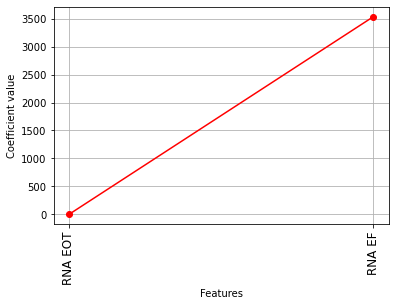

In [89]:
# Index is a variable with the index of the column where the 'RNAEF' variable is located, thus this slicing will take both
# the 'RNAEF' and 'RNAEOT' variables.
multiplelinearregre(X_train_norm_train[:,index-1:index+1], X_test_norm_train[:,index-1:index+1], 
                    Y_train_train, Y_test_train, ['RNA EOT', 'RNA EF'])

USING SKLEARN
Intercept of the model: 294365.29479768785 

Coefficients of the model: [-2983.1090719   2876.94077889  1626.38763445 -1148.54341156]

 R Squared: -0.005864662206681803 
 Mean Squared Error:70363087368.73701 

List of Nº of targets (from 0 to Nº of targets - 1):  [0 1 2 3]

 USING STATSMODELS


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  RNA12   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                            0.05343
Date:                Sat, 16 Oct 2021   Prob (F-statistic):                       0.984
Time:                        18:29:06   Log-Likelihood:                         -14899.
No. Observations:                1038   AIC:                                  2.980e+04
Df Residuals:                    1035   BIC:                                  2.982e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2983.1091   1.01e+04     -0.296      0.767   -2.28e+04    1.68e+04
x2          2876.9408   1.02e+04      0.281      0.779   -1.72e+04     2.3e+04
x3          1626.3876      1e+04      0.162      0.871   -1.81e+04    2.13e+04
x4         -1148.5434   8381.755     -0.137      0.891   -1.76e+04    1.53e+04
==============================================================================
Omnibus:                      541.415   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13135.050
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                      20.021   Cond. No.                     7.31e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.98e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

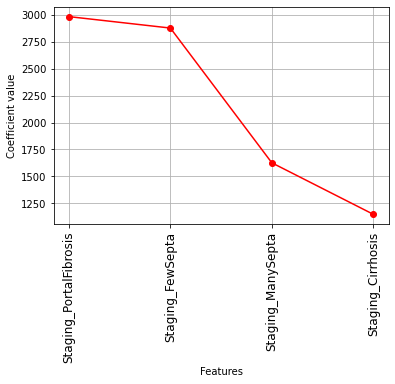

In [90]:
# Index is a variable with the index of the column where the 'RNAEF' variable is located, thus this slicing will take both
# the 'RNAEF' and 'RNAEOT' variables.
multiplelinearregre(X_train_norm_train[:,index:], X_test_norm_train[:,index:], 
                    Y_train_train, Y_test_train, ['Staging_PortalFibrosis', 'Staging_FewSepta', 'Staging_ManySepta',
                                                 'Staging_Cirrhosis'])

#### Conclusion:
    As previously commented the more relevant features to predict 'RNA 12' are: 'RNA EOT' and 'RNA EF'. This time the $R^2$ coefficient indeed improved compared to the previous models, however, it is still too low (around 0.29). Therefore, this model is not a good to predict 'RNA 12'. 
    Most probably this conclusion is somewhat related to the fact that the correlation between both variables is not high enough.

You can explore results when: (1) normalizing data; (2) discarding some features based on their coefficients; (3) using other approaches such stats

Now, using a different approach to build the model.